<h1><b><u>Problem Description</u></b></h1>

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.<br>
<p>
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.
</p>
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [123]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd
from collections import Counter

#Visualization
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

# Machine Learning Libraries

#Sci-kit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm



In [124]:
# Surpas Warning
import warnings
warnings.filterwarnings("ignore")

In [125]:
lead=pd.read_csv("Leads.csv")
lead.shape

(9240, 37)

In [126]:
lead.head(10)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,660680,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,No,No,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,660673,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,India,Supply Chain Management,Online Search,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,No,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,660664,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,660624,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,India,IT Projects Management,NaN,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,No,Yes,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,660616,API,Google,No,No,0,4.0,58,4.0,Email Opened,India,Finance Management,Word Of Mouth,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,No,No,Email Opened


In [127]:
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


Inspect dataFrame

In [128]:
#database dimension

print("Database dimendion   :",lead.shape)
print("Database size        :",lead.size)
print("Number of row        :",len(lead.index))
print("Number of COlumns    :",len(lead.columns))

Database dimendion   : (9240, 37)
Database size        : 341880
Number of row        : 9240
Number of COlumns    : 37


In [129]:
#checking numerical columns statistics
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [130]:
#info about the column type etc.
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

<B>Strategy</B></br>
<p>
There are quite a few columns which has 'Select' as one of the category. This is most probably becaue the person has not filled that field.We will replace this field with NaN </p>

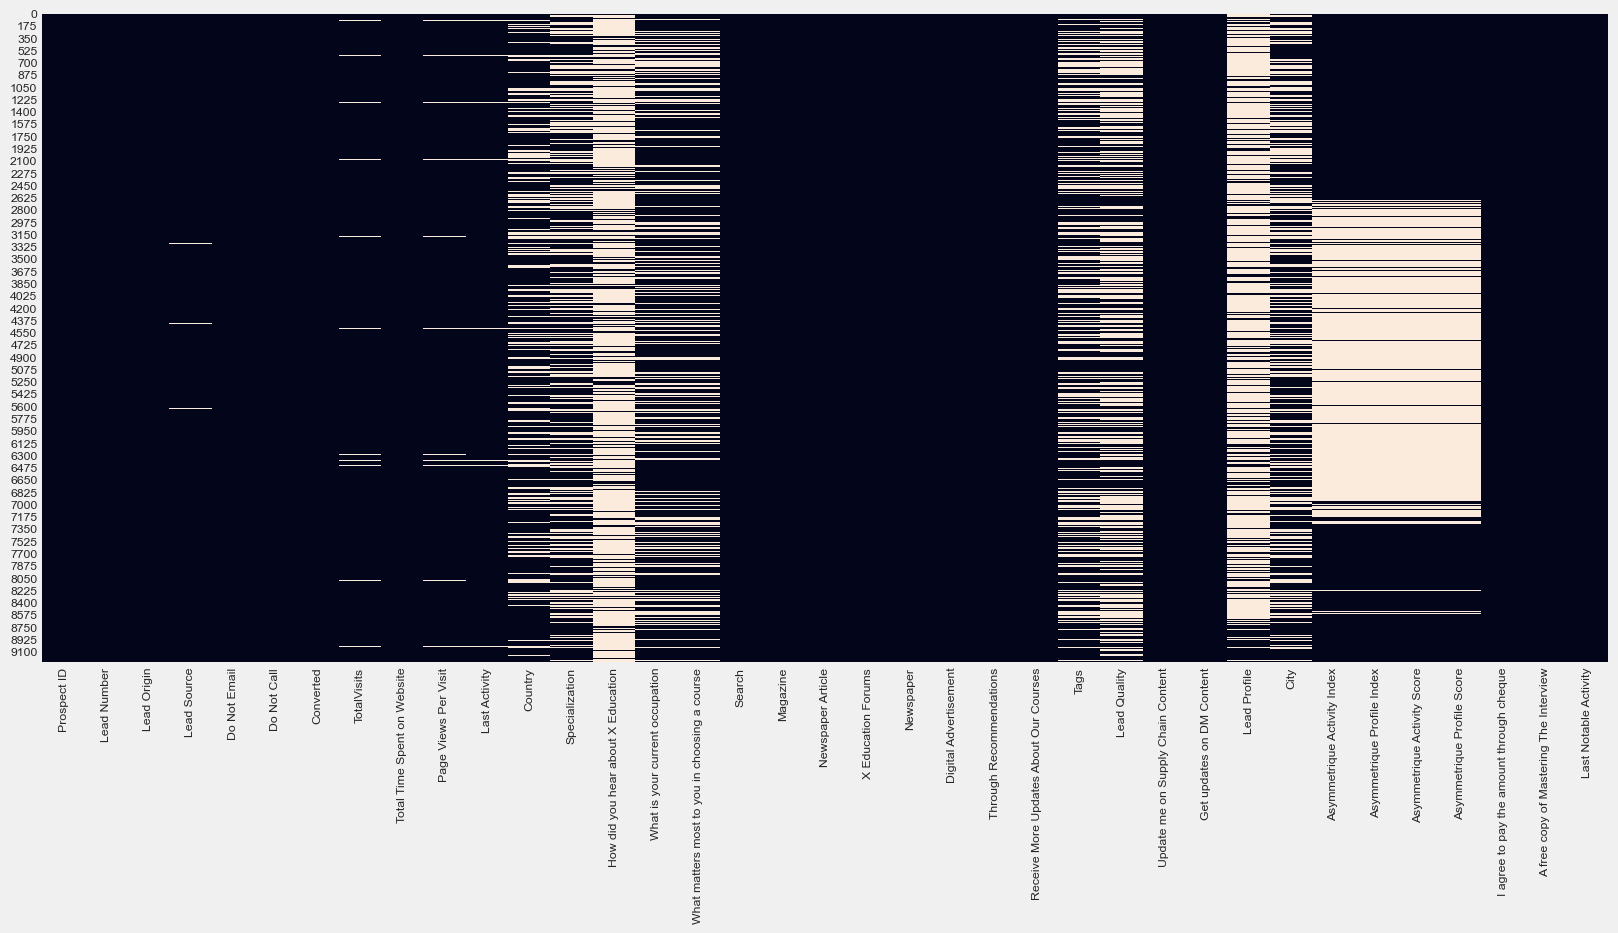

In [131]:
lead=lead.replace('Select', np.nan)

plt.figure(figsize =(18,8))
sns.heatmap(lead.isnull(),cbar=False)
plt.show()

Column wisw Null Value Calculation

In [132]:
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


Row wisw Null Value Calculation

In [133]:
Row_Null50_Count = len(lead[lead.isnull().sum(axis=1)/lead.shape[1]>0.5])
print( 'Total number of rows with more than 50% null values are : ', Row_Null50_Count)

Total number of rows with more than 50% null values are :  0


<b>Insight</b></br>
There are 17 columns with null values. 7 columns have more than 45% unknowns which we should drop as imputing these columns will introduce bias. No rows whcih have more than 50% null values.

<h2><b>Duplicate Analysis</b></h2>

In [134]:
print("Total number of duplicate values in Prospect ID column :" , lead.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead.duplicated(subset = 'Lead Number').sum())

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0


<b>Insight:</b></br>
Both the ProspectID and Lead Number are unique columns and hence we wont need for prediction

<h2><b>Data Cleaning 🗑️</b></h2>

Delete High Null Columns

<b>Strategy</B><br>
Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped. We will also remove the columns which has more than 45% Null Values.
Also, some of the variables like Lead Quality, Tags, Asymmetrique scores and profile etc. are created by the sales team once they contact the potential lead. These variables will not be available for the model building as these features would not be available before the lead is being contacted.
Last Notable Activity is an intermediate column which is an update while the sales team representative is in touch with the lead.
Thus, we can drop these columns too.

In [135]:
cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [136]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

26

Insights: <br>
We have suceessfully deleted 10 columns where the columns had high null values or they are information which will not be available for models when it ran as they are calculated / selected by sales personnel when they contact potential leads.

<b>Segregating Categorical & Numerical Values</b>

In [137]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
numerical_col = lead.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview'] 


NUMERICAL FEATURES : 
 ['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit'] 


<b>Categorical Columns Null Value Treatment</b>

In [138]:
# Checking unique values and null values for the categorical columns
def Cat_info(df, categorical_column):
    df_result = pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp["columns"] = [value]
        df_temp["values"] = [df[value].unique()]
        df_temp["unique_values"] = df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [139]:
df_cat = Cat_info(lead, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro Cities, Other Cities, Other Cities of Maharashtra, Tier II Cities]",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Advertising, Supply Chain Management, IT Projects Management, Finance Management, Travel and Tourism, Human Resource Management, Marketing Management, Bank...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & Convenience, Other]",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professional, Businessman, Other, Housewife]",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab Emirates, United States, Australia, United Kingdom, Bahrain, Ghana, Singapore, Qatar, Saudi Arabia, Belgium, France, Sri Lanka, China, Canada, Nether...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreachable, Converted to Lead, Olark Chat Conversation, Email Bounced, Email Link Clicked, Form Submitted on Website, Unsubscribed, Had a Phone Conversatio...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, Google, Referral Sites, Welingak Website, Reference, google, Facebook, nan, blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, Lead Import, Quick Add Form]",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


<box>Insight:
*   Some of the columns have only 1 category.Example - Magazine,I agree to pay the amount through cheque etc. These columns will not add any value to the model and can be deleted.
*   Some of the columns have one of the value as "Select" These should be considered as null values. Data Value needs to be updated for these columns
</box>

In [140]:
# Appending the columns to col_to_drop where only 1 category value is present

cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [141]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

21

Checking the new null value and column details for Categorical columns

In [142]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro Cities, Other Cities, Other Cities of Maharashtra, Tier II Cities]",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Advertising, Supply Chain Management, IT Projects Management, Finance Management, Travel and Tourism, Human Resource Management, Marketing Management, Bank...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & Convenience, Other]",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professional, Businessman, Other, Housewife]",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab Emirates, United States, Australia, United Kingdom, Bahrain, Ghana, Singapore, Qatar, Saudi Arabia, Belgium, France, Sri Lanka, China, Canada, Nether...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreachable, Converted to Lead, Olark Chat Conversation, Email Bounced, Email Link Clicked, Form Submitted on Website, Unsubscribed, Had a Phone Conversatio...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, Google, Referral Sites, Welingak Website, Reference, google, Facebook, nan, blog, Pay per Click Ads, bing, Social Media, WeLearn, Click2call, Live Chat...",21,36,0.4
X Education Forums,"[No, Yes]",2,0,0.0
Through Recommendations,"[No, Yes]",2,0,0.0


Now we can proceed with addressing individual columns for null values

<h1>City 🏢</h1>

In [143]:
lead['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [144]:
# Let's check how City and Country are connected with each other
lead.groupby(['Country','City'])['Country'].count()

Country        City                       
Australia      Mumbai                         6
               Other Cities                   2
               Thane & Outskirts              3
Bahrain        Mumbai                         1
               Other Cities                   2
                                             ..
United States  Other Cities of Maharashtra    5
               Other Metro Cities             4
               Thane & Outskirts              5
               Tier II Cities                 1
Vietnam        Mumbai                         1
Name: Country, Length: 84, dtype: int64

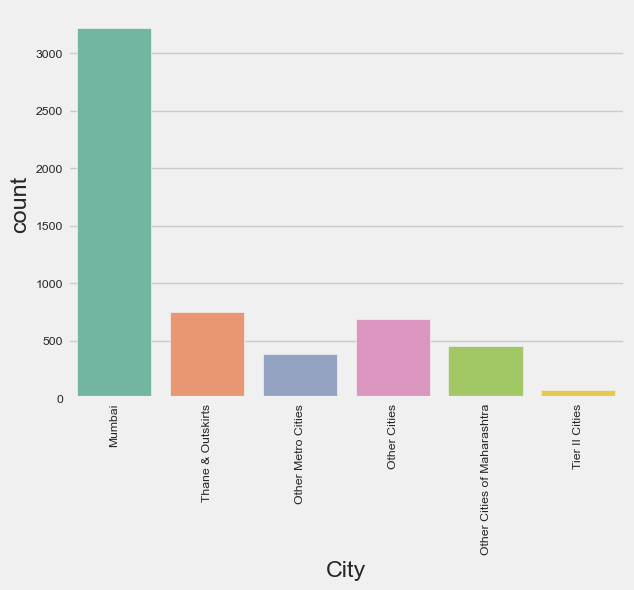

In [145]:
plt.style.use('fivethirtyeight')
ax = sns.countplot(data=lead, x='City', palette='Set2')
plt.xticks(rotation=90)
plt.show()

<b>Insight:</b><br>
As there is almost 40% unknown values, we cannot impute with mode as it is make the whole data skewed. Also, X-Education is online teaching platform. The city information will not be much useful as potential students can available any courses online despite their city. We will drop the column from analysis.

In [146]:
lead.drop("City",axis=1, inplace = True)
len(lead.columns)

20

<B>Specialization</b>

In [147]:
lead['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

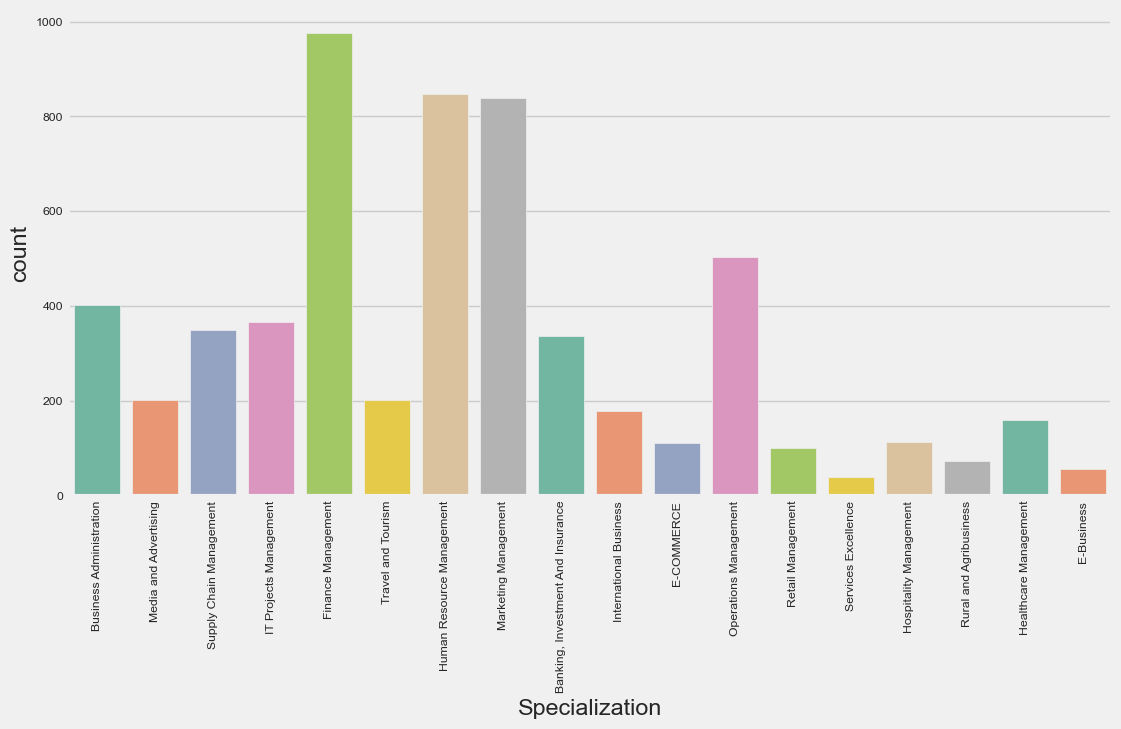

In [148]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=lead, x='Specialization', palette='Set2')
plt.xticks(rotation=90)
plt.show()

<B>Insight:</B>
It may be possible that the lead has no specialization or may be a student and has no work experience yet , thus he/she has not entered any value. We will create a new category called 'Others' to replace the null values.

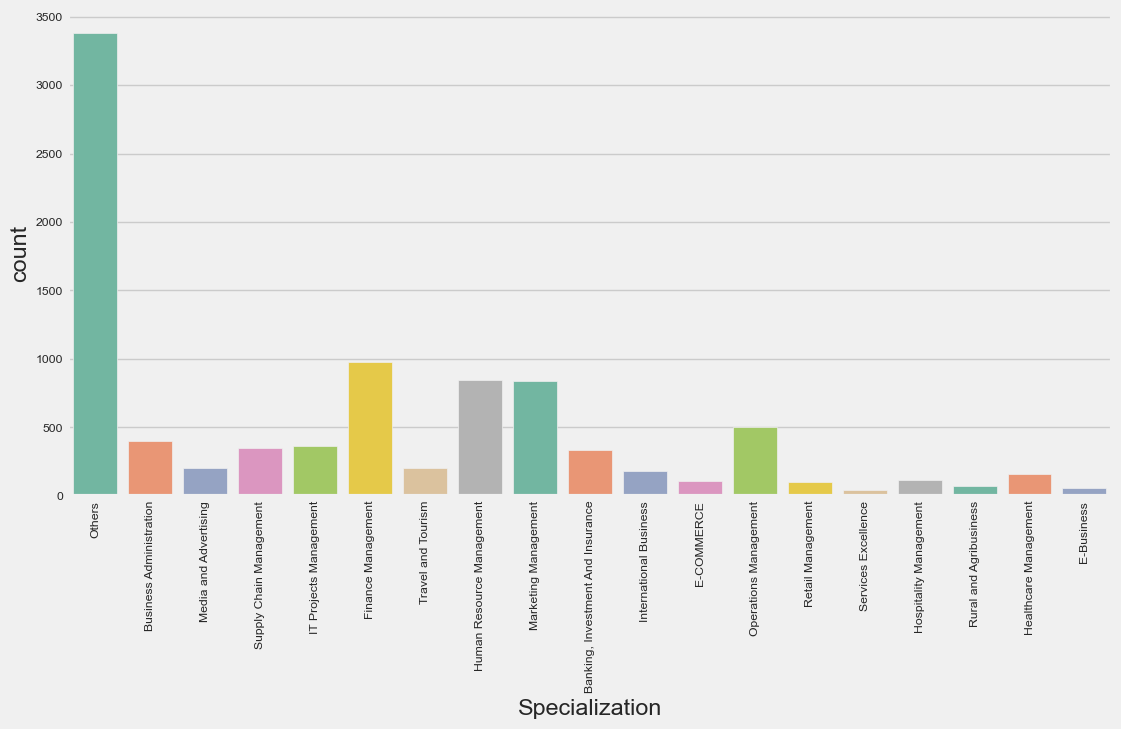

In [149]:
lead['Specialization'] = lead['Specialization'].replace(np.nan, 'Others')
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=lead, x='Specialization', palette='Set2')
plt.xticks(rotation=90)
plt.show()

<h2>What matters most to you in choosing a ourse??🤔</h2>

In [150]:
lead['What matters most to you in choosing a course'].value_counts(normalize= True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

<b>Insight:</b><br>
As the data is skewed we can delete the column

In [151]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

19

<h2>What is your Current Occupation???🤔</h2>

In [152]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Insight:<br>
85.5% values are "Unemployed". If we impute the data as "Unemployed" then data will become more skewed. Thus, we will impute the value as "Unknown".

In [153]:
#lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unemployed')
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
lead['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              60.606061
Unknown                 29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

<h2><b>Country🗺️</h2></b>

In [154]:
#Let's check how is the Country data distributed
lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

Insight:<br>
Country data is heavily skewed as 95% of the data is mapped as India. Similar to City, Country data is not required for Model building as X-Education is online platform. We will drop the country columns too.

In [155]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

18

<h2>Last Activity</h2>

In [156]:
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())
print("Percentage of null values in Last Activity column is : ", round(lead['Last Activity'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Last Activity column is :  103
Percentage of null values in Last Activity column is :  1.11


In [157]:
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

Insight:<br>
As we are unsure what could be the Last activity, we will replace it with the most frequent activity "Email Opened".

In [158]:
lead['Last Activity'] = lead['Last Activity'].replace(np.nan, 'Email Opened')
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())

Number of null values in Last Activity column is :  0


<h2>Lead Score</h2>

In [159]:
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())
print("Percentage of null values in Lead Source column is : ", round(lead['Lead Source'].isnull().sum()/lead.shape[0]*100,2))

Number of null values in Lead Source column is :  36
Percentage of null values in Lead Source column is :  0.39


In [160]:
lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

Insight:<br>
As Google seems to be most used Lead Source, we will replace null values with Google. There is a category 'google' which is same as 'Google' We will replace the values

In [161]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace(['google'], 'Google')
print("Number of null values in Lead Source column is : ", lead['Lead Source'].isnull().sum())

Number of null values in Lead Source column is :  0


<h2><b> Numerical COlumns Null Value Treatment</b></h2>

In [162]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result


In [163]:
df_num = Num_info(lead,numerical_col)
df_num

,null_values,null_percent
columns,,
TotalVisits,137,1.5
Page Views Per Visit,137,1.5
Converted,0,0.0
Total Time Spent on Website,0,0.0


<B>Total Visits</B>

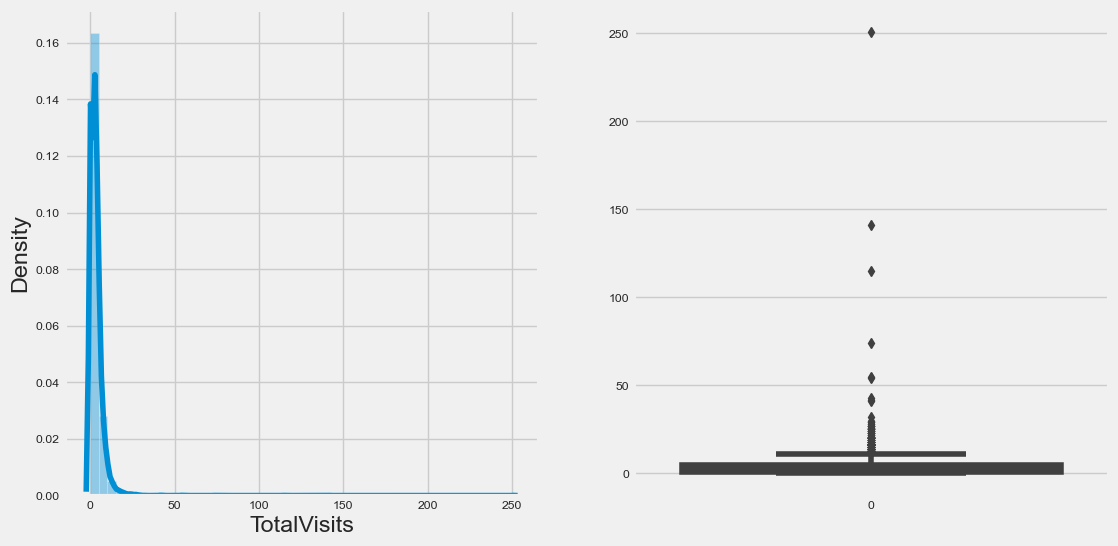

In [164]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])
plt.show()

Insight:<br>
As we see there are some outliers in the data, we will impute with median and not mean value.

In [165]:
lead['TotalVisits'].fillna(lead['TotalVisits'].median(), inplace=True)
lead['TotalVisits'].isnull().sum()

0

<b>Page Views Per visit</b>

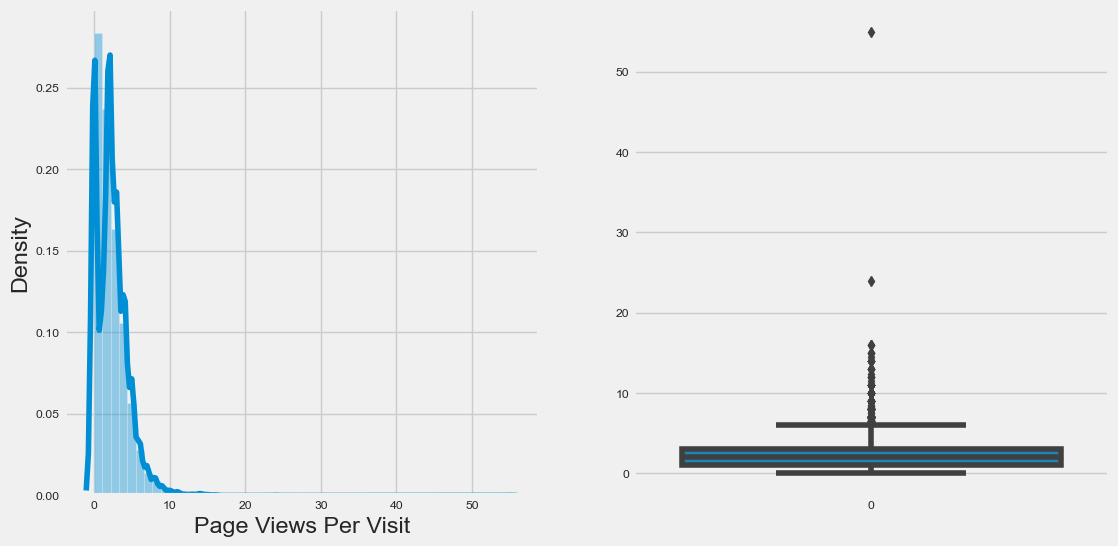

In [166]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

Insight:<br>
As we see there are some outliers in the data, we will impute with median and not mean value.

In [167]:
lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median(), inplace=True)
lead['Page Views Per Visit'].isnull().sum()

0

<h1>EDA(Exploratory Data Analysis)</h1>

<B>*    Data Imbalance</B>

In [168]:
converted = lead['Converted'].value_counts().rename_axis('unique_values').to_frame('counts')
converted

,counts
unique_values,
0,5679
1,3561


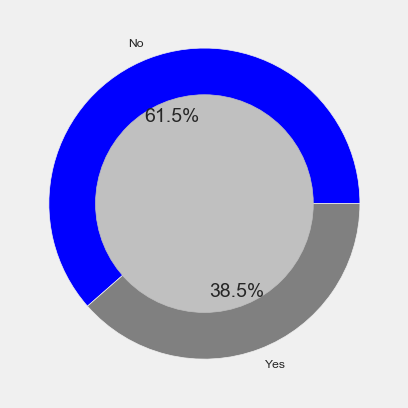

In [169]:
my_circle=plt.Circle( (0,0), 0.7, color='silver')
plt.pie(converted.counts, labels = ['No','Yes'],colors = ['blue','grey'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Insight:<br>
In the lead conversion ration, 38.5% has converted to leads where as 61.5% did not convert to a lead. So it seems like a balanced dataset.

<b>GRaph Functions</b>

Insight:<br>
Most of the features in the dataset are categorical. Let us begin our analysis by performing segmented univariate analysis on each categorical feature. We will view bar plots that will show the total count of converted and non-converted leads in every category.

In [170]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [171]:
# Renaming some of the column headers which has long header

lead.rename(columns={'What is your current occupation': 'Occupation', 
                     'Through Recommendations': 'Recommendation',
                     'A free copy of Mastering The Interview': 'Free Copy'                   
                    },inplace = True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

<b>Univariate Analysis- Categoriacal</b>

Lead origin

In [172]:
#Run the function to get plot categorical plots 
def univariate_categorical(column, label_rotation=False):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(data=lead, x=column)
    if label_rotation:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()


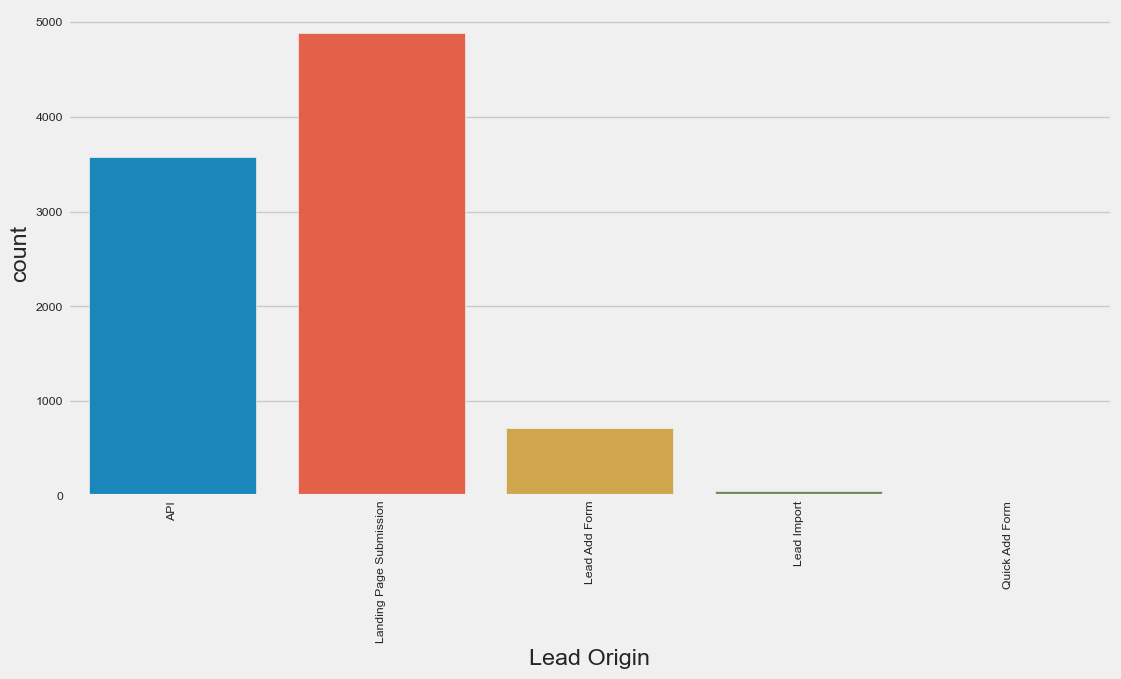

In [173]:
univariate_categorical("Lead Origin", label_rotation=True)

Lead Score<B>

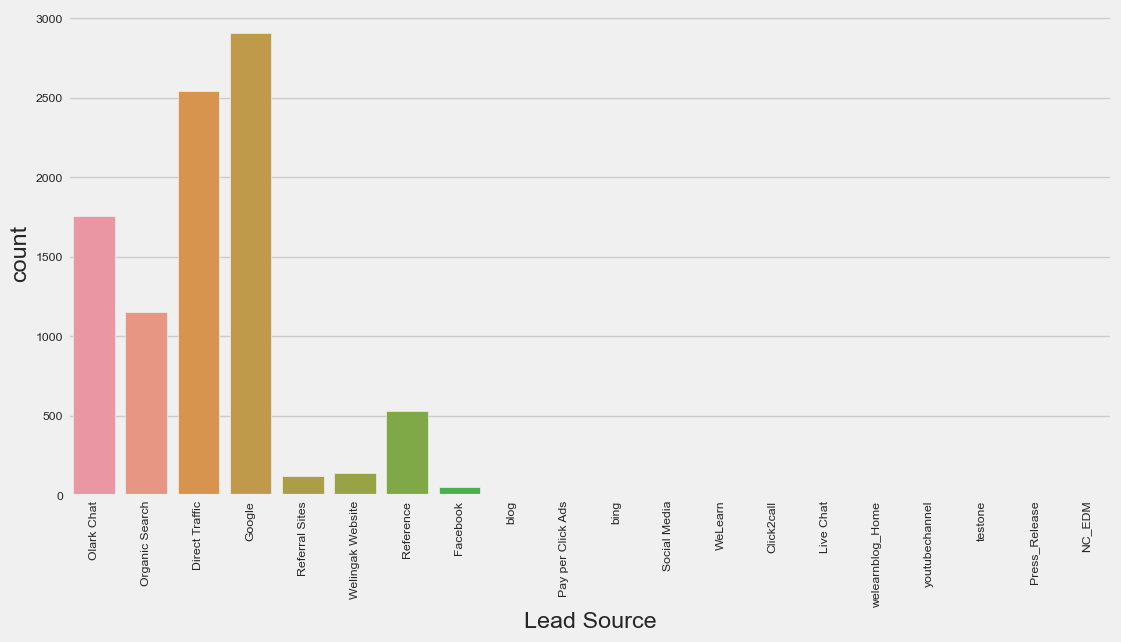

In [174]:
#Run the function to get plot categorical plots
univariate_categorical("Lead Source",label_rotation=True)

<b>Strategy</b>
We will combine smaller lead sources as 'Other Sources'.

In [175]:
lead['Lead Source'] = lead['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other Sources')

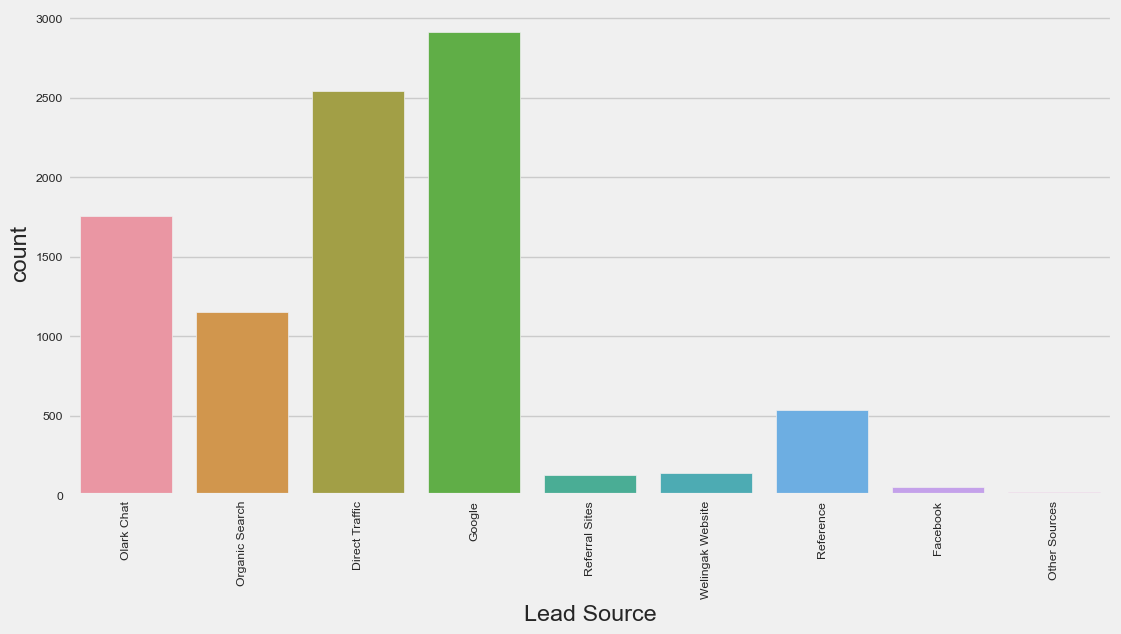

In [176]:
#Running the function again to check the updated statistics
univariate_categorical("Lead Source",label_rotation=True)

<b>Do not email</b>

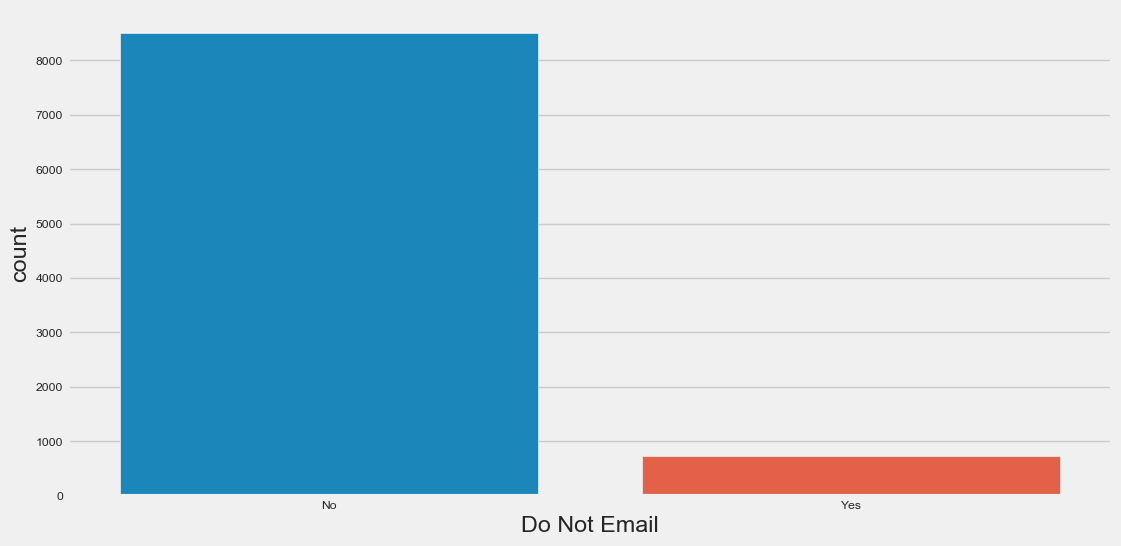

In [177]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

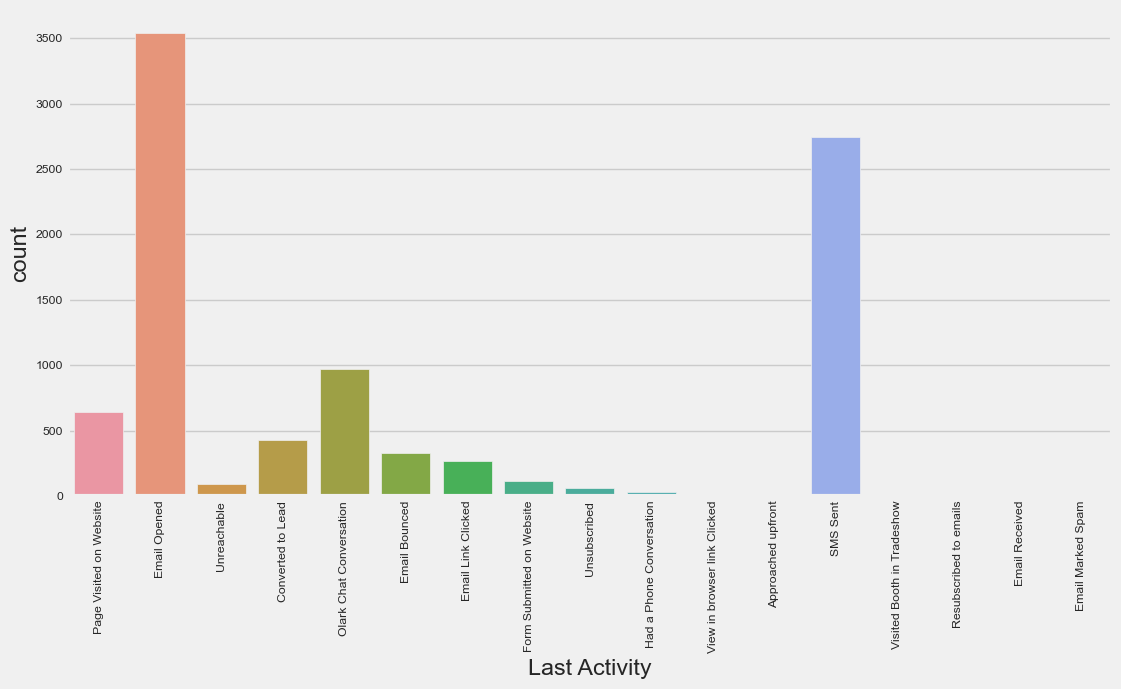

In [178]:
#Run the function to get plot categorical plots  #Last activity
univariate_categorical("Last Activity",label_rotation=True)

Strategy:<br>
We will combine smaller Last Activity values as 'Other Activity'

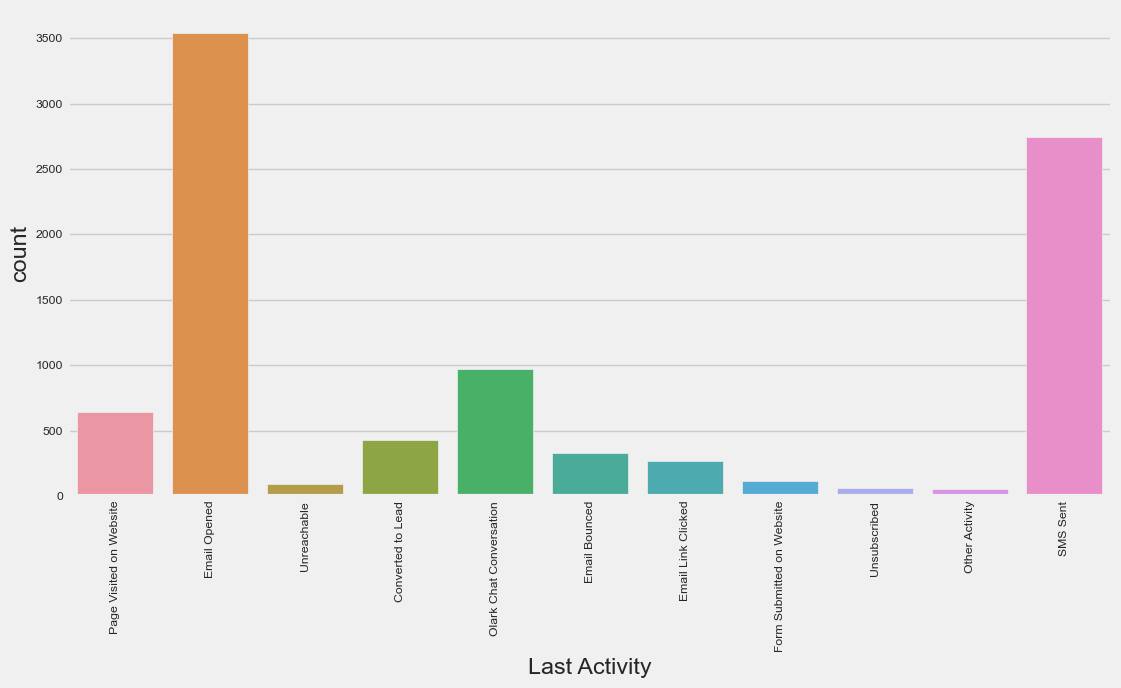

In [179]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
lead['Last Activity'] = lead['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other Activity')
#Run the function to get plot categorical plots
univariate_categorical("Last Activity",label_rotation=True)

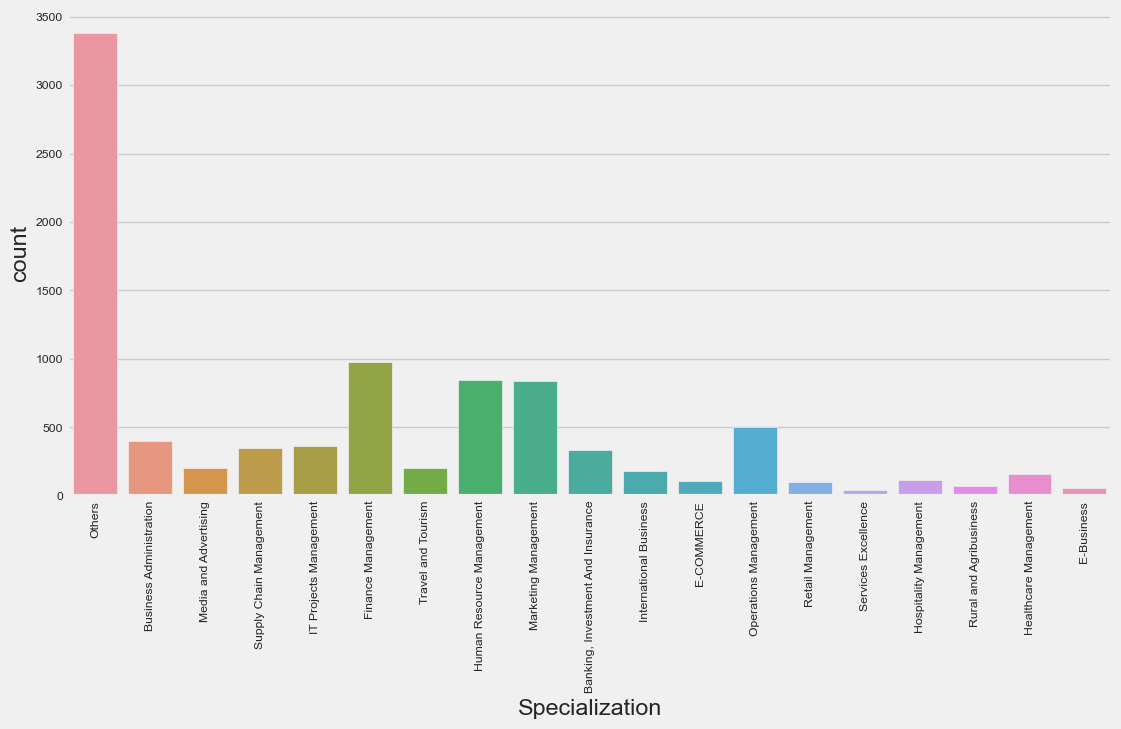

In [180]:
#Run the function to get plot categorical plots
univariate_categorical("Specialization",label_rotation=True)

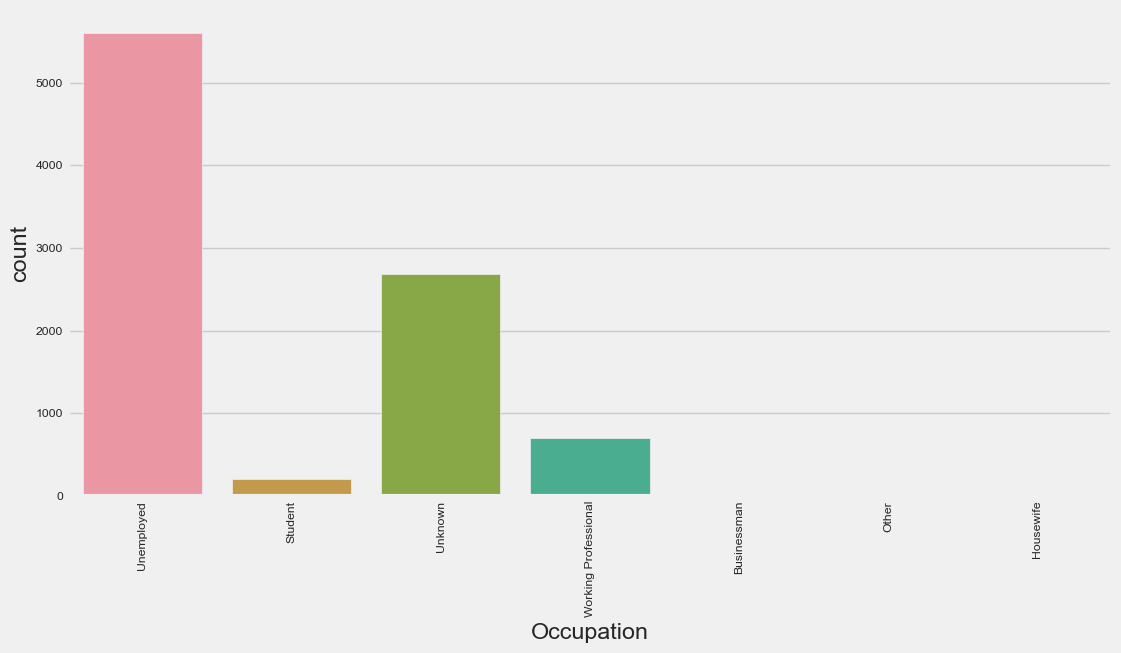

In [181]:
#Run the function to get plot categorical plots
univariate_categorical("Occupation",label_rotation=True)

Insight:<br>
*   Though Housewives are less in numbers, they have 100% conversion rate
*   Working professionals, Businessmen and Other category have high  conversion rate
*   Though Unemployed people have been contacted in the highest number, the conversion rate is low (~40%)<br>
<b>We cannot combine smalled value categories as their conversion rate is very different. Combing them may provide wrong predictions.<b>

<h2><b>Search, Newspaper, Newspaper Article, Digital Advertisement,  X Education Forums, Free Copy</b></h2>

The following features have two categories only. We are going to evaluate the skewness of the data and decide whether to exclude them from model building.

In [182]:
def pieplot(col):
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    converted = lead[col].value_counts().rename_axis('unique_values').to_frame('counts')
    plt.pie(converted.counts, labels = ["No","Yes"],colors = ['red','green'],autopct='%1.1f%%')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.title(col)

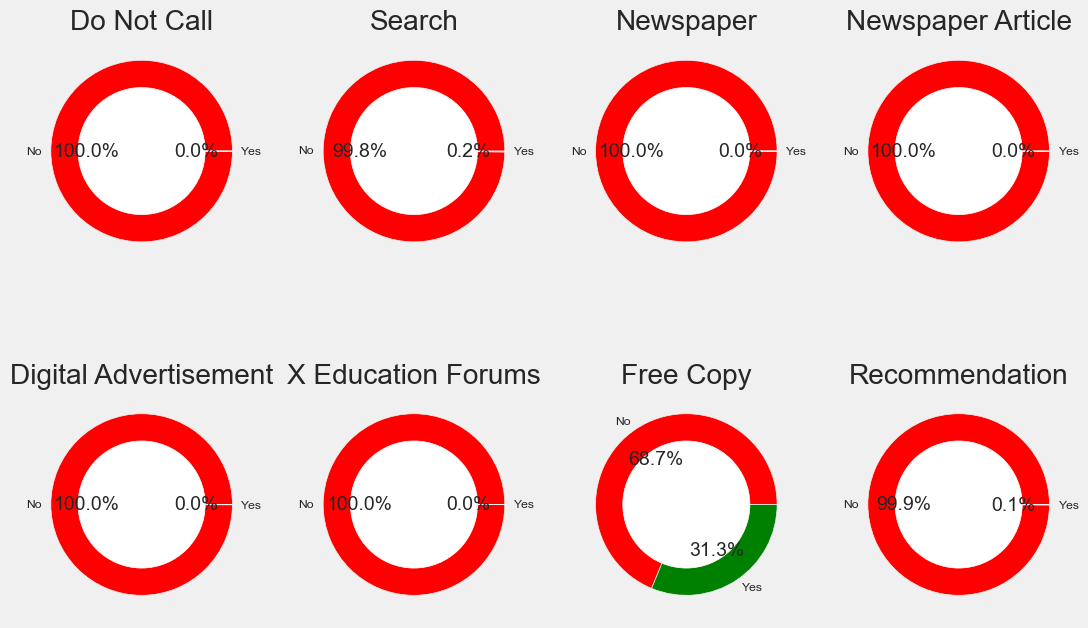

In [183]:
# Lets lookinto the data distribution of the following columns
col = ['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']
plt.figure(figsize = (12,8))
i=1
for each_col in col:
    plt.subplot(2,4,i)
    pieplot(each_col)
    i+=1

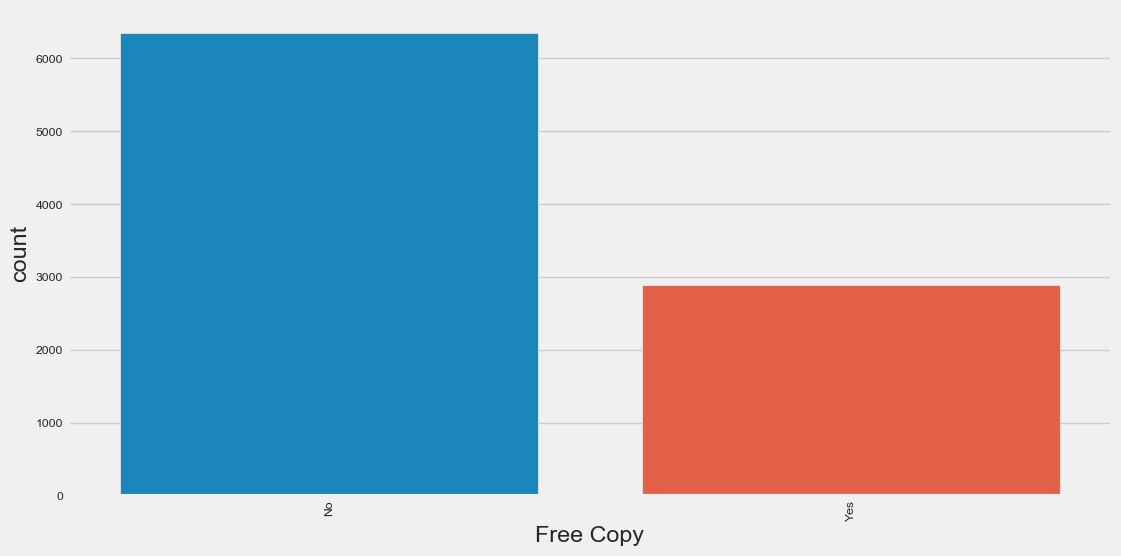

In [184]:
#Run the function to get plot categorical plots
univariate_categorical("Free Copy",label_rotation=True)

<h3>Strategy</h3><br>
Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Recommendation data are very skewed and can be deleted as they will not add any value to the model.
Distributing Free-Copy of Mastering Interview doesn't seem to add much value as the coenversion rate is almost same. We will drop all these columns.

In [185]:
lead.drop(col,axis = 1, inplace = True)
len(lead.columns)

10

<h2>Univariate analysis- Numericals</h2>

In [186]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation'],
      dtype='object')

<Figure size 1200x1200 with 0 Axes>

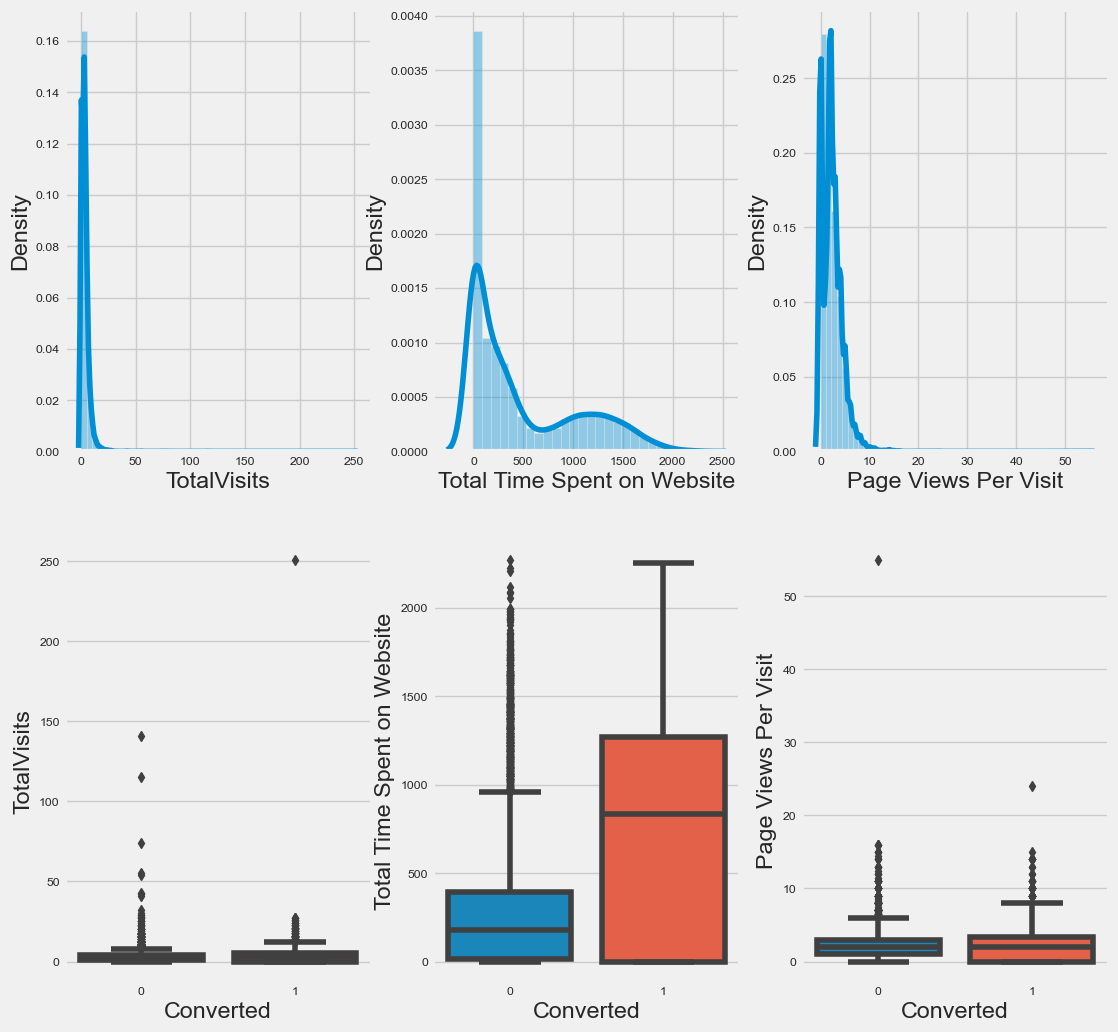

In [187]:
numerical_cols= ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(12,12))
plt.figure(figsize=(12,12))

i=1
for col in numerical_cols:
    plt.subplot(2,3,i)
    sns.distplot(lead[col])
    plt.subplot(2,3,3+i)
    sns.boxplot(y=lead[col], x = lead['Converted'])
    i+=1

<b>Insight</b><br>
TotalVisits and Page Views per Visit has some outliers which needs to be treated.

<h1>Bivariate Analysis</h1> 

<Figure size 2000x2000 with 0 Axes>

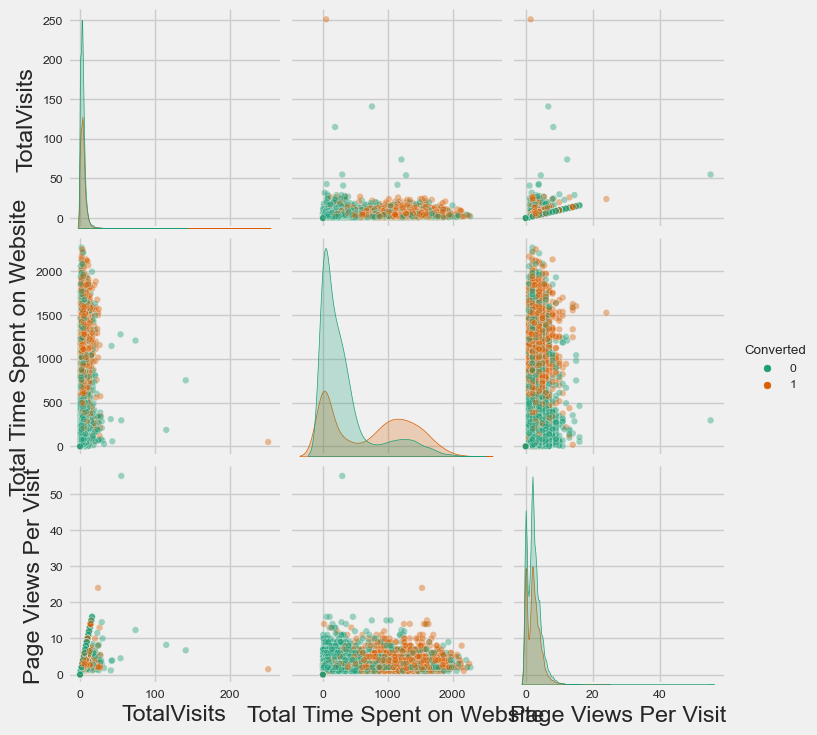

In [188]:
plt.figure(figsize =(20,20))
sns.pairplot(lead[numerical_col],hue="Converted",kind='scatter', plot_kws={'alpha':0.4},palette = 'Dark2')                                  
plt.show()

<b>Insight</b>
Data is not normally distributed

<h1><b><u>Data Preparation</u></b></h1>

Outliers Treatment

In [189]:
#Checking the detailed percentile values
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


In [190]:
numerical_col

array(['Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit'], dtype=object)

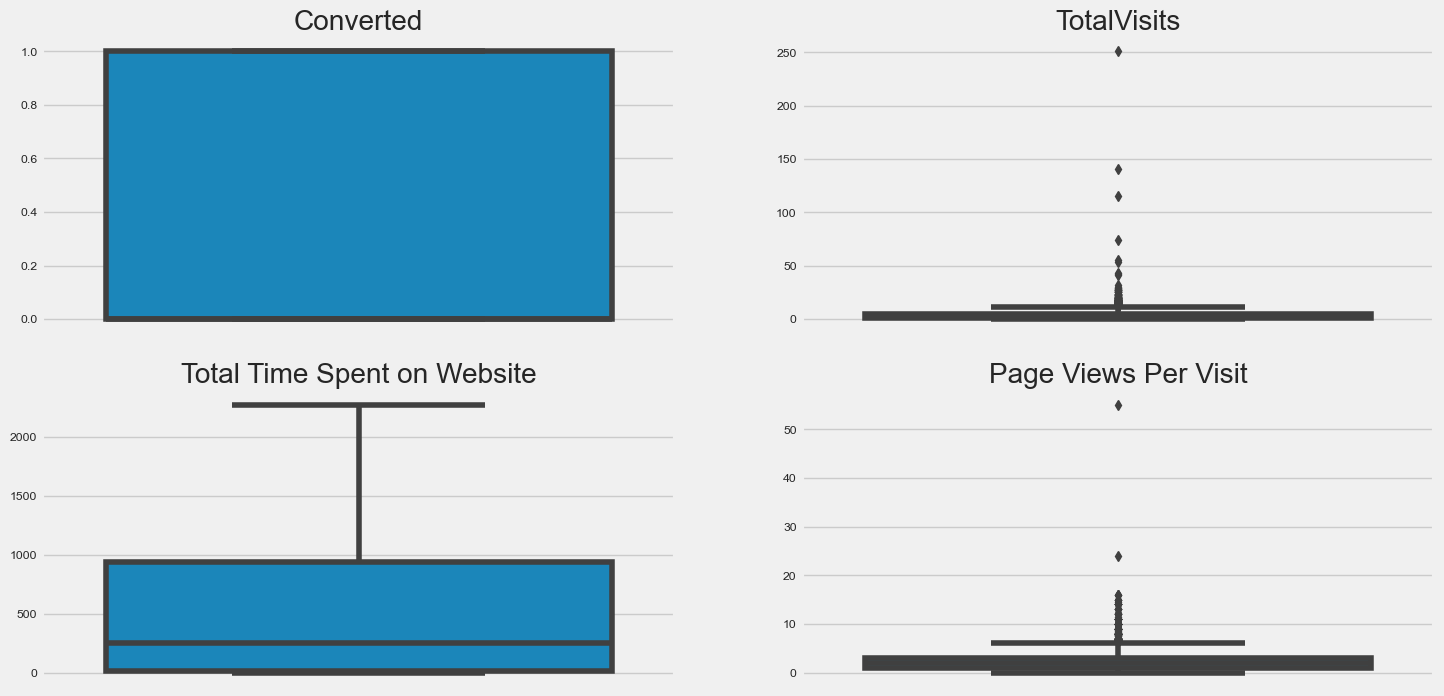

In [191]:
#Plotting the numerical columns for outlier values
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

<b>Insight:</b><br>
Though outliers in TotalVisits and Page Views Per Visit shows valid values, this will misclassify the outcomes and consequently create problems when making inferences with the wrong model. Logistic Regression is heavily influenced by outliers. So lets cap the TotalVisits and Page Views Per Visit to their 95 th percentile due to following reasons:
*   Data set is fairly high number
*   95th percentile and 99th percentile of these columns are very close and hence impact of capping to 95th or 99th percentile will be the same

In [192]:
#Capping the data at 95% percetile value
Q4 = lead['TotalVisits'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for TotalVisits column : ",len(lead[lead['TotalVisits'] >= Q4]))
lead.loc[lead['TotalVisits'] >= Q4, 'TotalVisits'] = Q4 # outlier capping

Q4 = lead['Page Views Per Visit'].quantile(0.95) # Get 95th quantile
print("Total number of rows getting capped for Page Views Per Visit column : ",len(lead[lead['Page Views Per Visit'] >= Q4]))
lead.loc[lead['Page Views Per Visit'] >= Q4, 'Page Views Per Visit'] = Q4 # outlier capping

Total number of rows getting capped for TotalVisits column :  467
Total number of rows getting capped for Page Views Per Visit column :  604


Insight:<br>
The number of rows getting capped are quite high. This is also the reason that we are capping the data instead of deleting it.

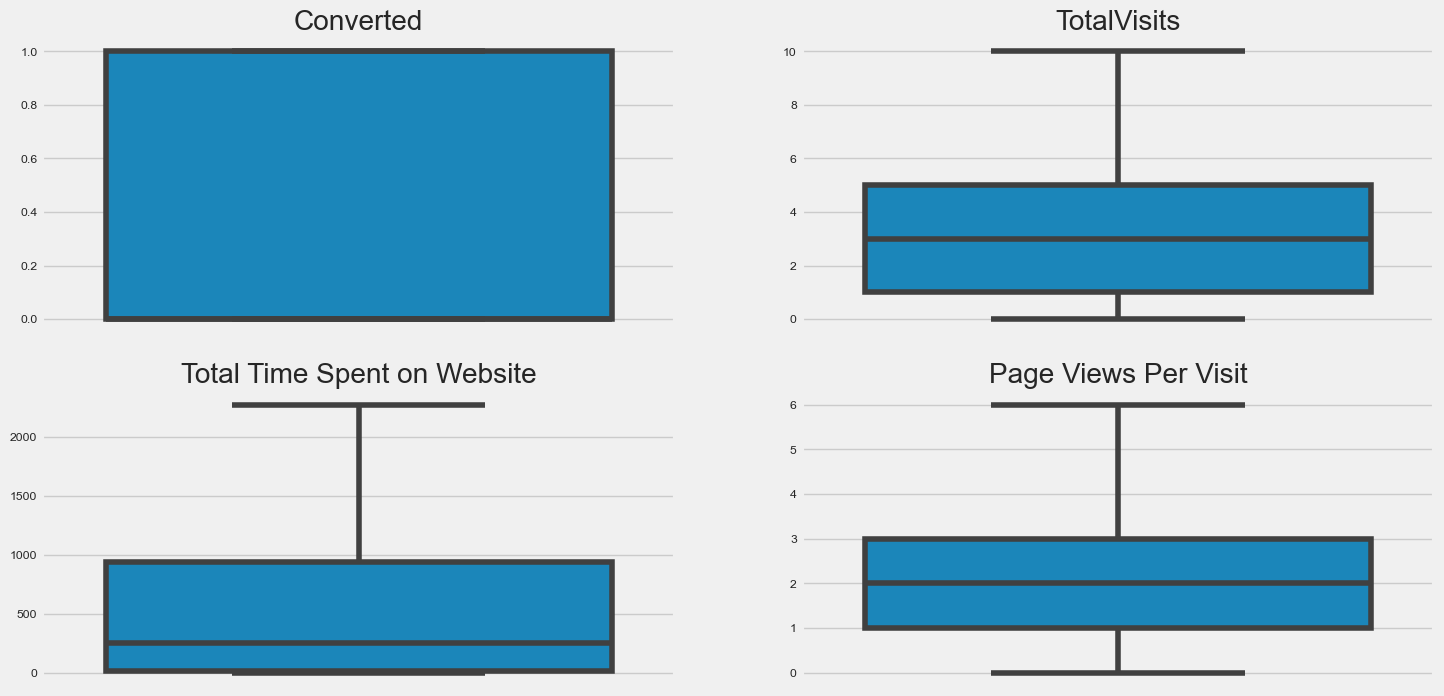

In [193]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

In [194]:
# Checking the percentile values again 
lead.describe(percentiles=[.1,.5,.25,.75,.90,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.179221,487.698268,2.255105
std,0.486714,2.761219,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
90%,1.000000,7.000000,1380.000000,5.000000
95%,1.000000,10.000000,1562.000000,6.000000


Insight:<br>
Now that we have capped the outliers, let's proceed to data preparation for model building.

<h2>Convert Binary Categories</h2>

In [195]:
# Checking the unique value counts for categorcial columns
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
TotalVisits                      11
Last Activity                    11
Specialization                   19
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [196]:
# Checking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [197]:
# List of variables to map

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the lead YES/NO variable list
lead['Do Not Email'] = lead[['Do Not Email']].apply(binary_map)

In [198]:
# rechecking the categorical values for 'Do Not Email' feature
lead['Do Not Email'].value_counts()

0    8506
1     734
Name: Do Not Email, dtype: int64

<h2>Dummy Variables</h2>

In [199]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization']], drop_first=True)

# Adding the results to the master dataframe
lead = pd.concat([lead, dummy1], axis=1)

lead.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [200]:
# We have created dummies for the below variables, so we can drop them
lead = lead.drop(['Lead Origin', 'Lead Source', 'Occupation', 'Last Activity', 'Specialization'], axis=1)
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

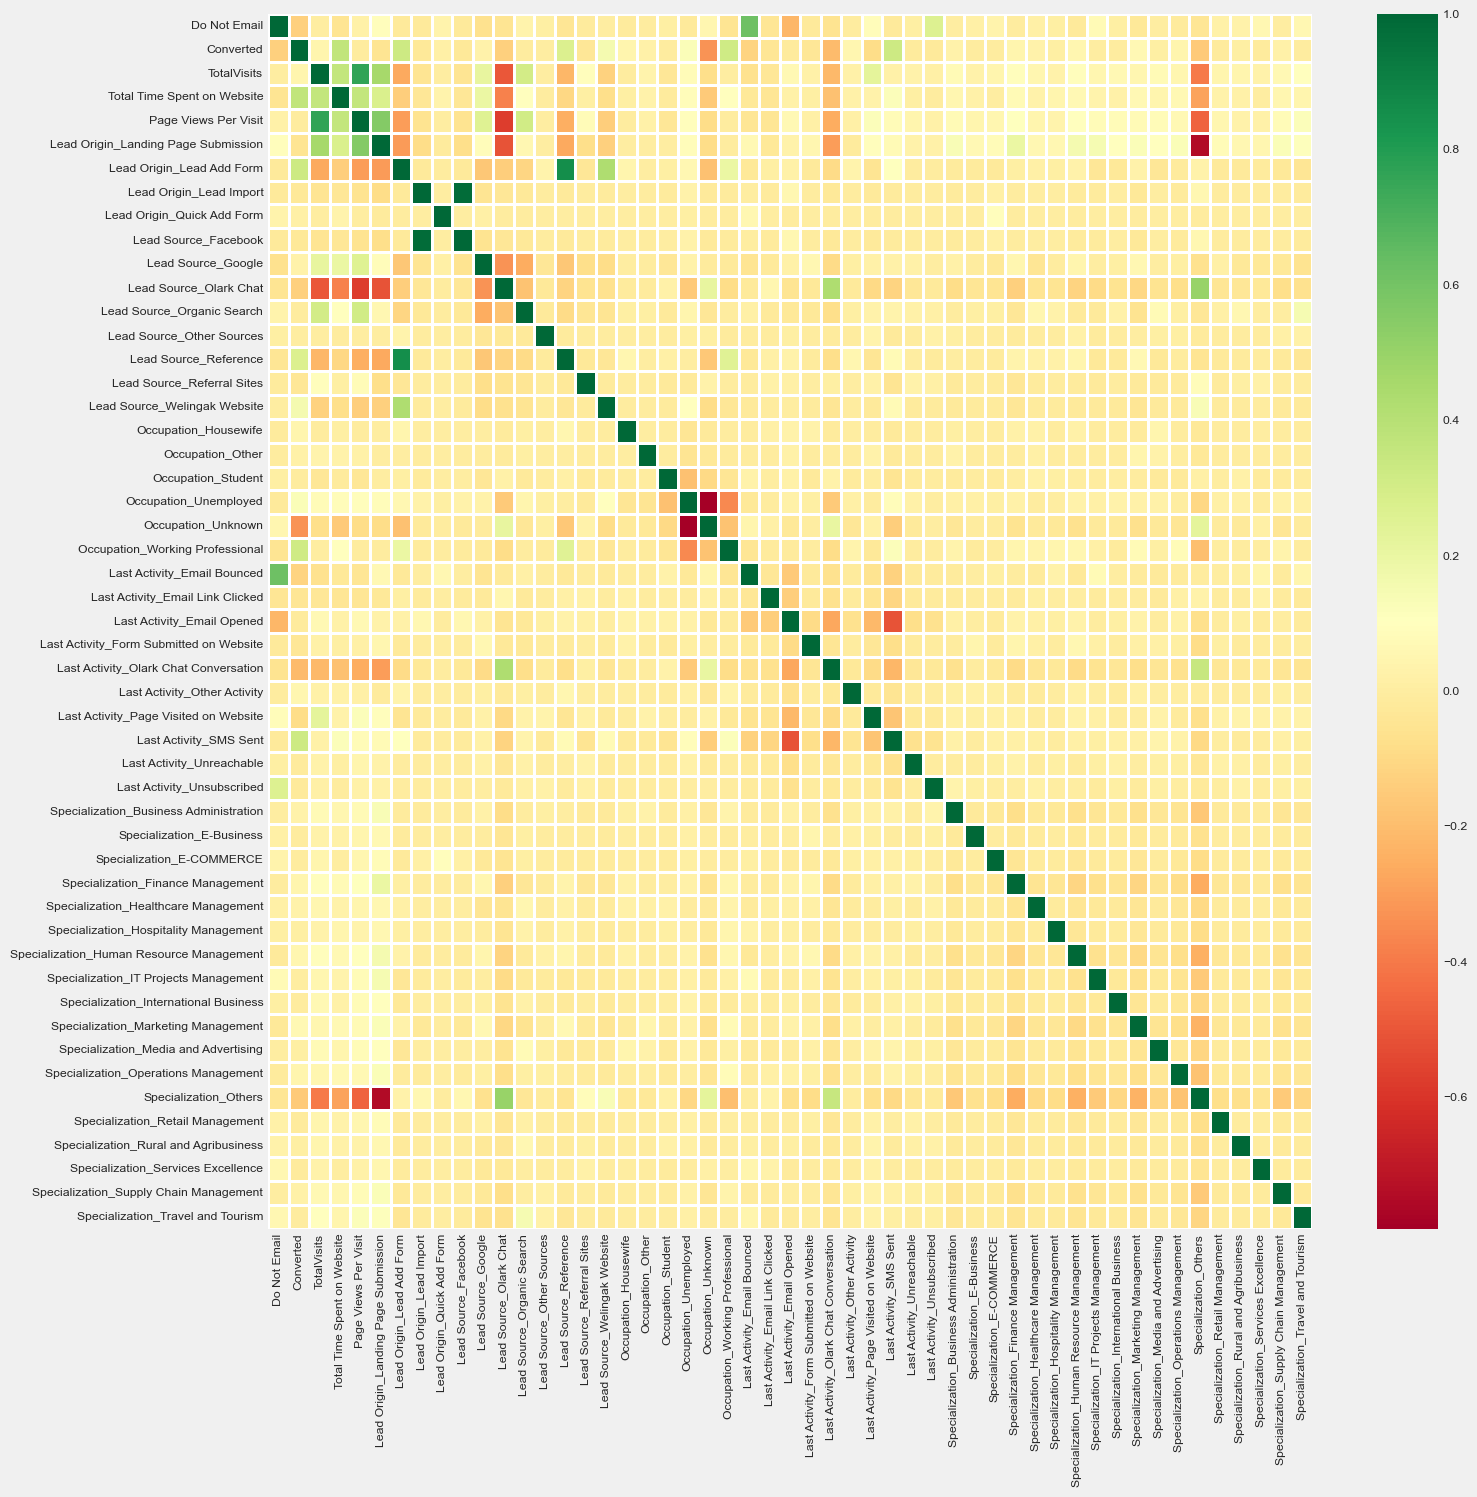

In [201]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [202]:
print('Total number of columns after One-Hot Encoding : ',len(lead.columns))

Total number of columns after One-Hot Encoding :  51


Insight:<br>
There are 51 columns in Heatmap which makes it difficult to interpret. Let's review top 5 positively and negatively correlated features.

In [205]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape), k=1).astype(bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns = ['VAR1', 'VAR2', 'Correlation']
corr_df.dropna(subset=["Correlation"], inplace=True)
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Display top 5 positively correlated variables
top_positive_corr = corr_df.head(5)
print(top_positive_corr)

                                     VAR1                       VAR2  \
466                  Lead Source_Facebook    Lead Origin_Lead Import   
720                 Lead Source_Reference  Lead Origin_Lead Add Form   
206                  Page Views Per Visit                TotalVisits   
1173          Last Activity_Email Bounced               Do Not Email   
259   Lead Origin_Landing Page Submission       Page Views Per Visit   

      Correlation  
466      0.981709  
720      0.853237  
206      0.767585  
1173     0.618470  
259      0.553423  


In [206]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
1091,Occupation_Unknown,Occupation_Unemployed,-0.794875
2300,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
565,Lead Source_Olark Chat,Page Views Per Visit,-0.573334
566,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950
1555,Last Activity_SMS Sent,Last Activity_Email Opened,-0.512325


<h2>Train - Test Split</h2>

In [207]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [208]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)


 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


<h3>Feature Scalig</h3>

Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales

In [209]:
scaler = StandardScaler()

X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.fit_transform(X_train[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


<h1><b><u>Model Building</u></b></h1>

<h2><b>RFE for Feature Reduction</b></h2>

In [218]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [219]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 14),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 11),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Other Sources', False, 3),
 ('Lead Source_Reference', False, 4),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Welingak Website', True, 1),
 ('Occupation_Housewife', True, 1),
 ('Occupation_Other', False, 7),
 ('Occupation_Student', False, 9),
 ('Occupation_Unemployed', False, 8),
 ('Occupation_Unknown', True, 1),
 ('Occupation_Working Professional', True, 1),
 ('Last Activity_Email Bounced', False, 27),
 ('Last Activity_Email Link Clicked', False, 10),
 ('Last Activity_Email Opened', True, 1),
 ('La

In [220]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Facebook', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Occupation_Housewife',
       'Occupation_Unknown', 'Occupation_Working Professional',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other Activity', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness'],
      dtype='object')

In [221]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Other Sources',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'S

In [222]:
# Functions to repeat Logictis regression model and VIF calculation repeatedly

# function to build logistic regression model
def build_logistic_model(feature_list):
    X_train_local = X_train[feature_list] # get feature list for VIF
    X_train_sm = sm.add_constant(X_train_local) # required by statsmodels   
    log_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit() # build model and learn coefficients  
    return(log_model, X_train_sm) # return the model and the X_train fitted with constant 

#function to calculate VIF
def calculate_VIF(X_train):  # Calculate VIF for features
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns # Read the feature names
    vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])] # calculate VIF
    vif['VIF'] = round(vif['VIF'],2)
    vif.sort_values(by='VIF', ascending = False, inplace=True)  
    return(vif) # returns the calculated VIFs for all the features

<h2>Manual Feature Reduction</h2>

<b>Strategy</b><br>
For Manual Feature Reduction, the following methods will be followed in order to reduce the features until we reach reasonable amount of feature count and maintain Sensitivity of the modeal =>80%<br>
1.  High P-Value <br>
2.  High VIF </br>
3.  High negative GLM coeeficient<br>
4.  Low Information Value (IV) generated based on WoE (Weight of Evidence)

*   Model

In [223]:
features = list(rfe_col) #  Use RFE selected variables
log_model1, X_train_sm1 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.5
Date:                Sat, 20 May 2023   Deviance:                       5200.9
Time:                        09:15:37   Pearson chi2:                 8.03e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4086
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7869      0.150     -5.233      0.000      -1.082      -0.492
Do Not Email                             -1.1731      0.182     -6.435      0.000      -1.530      -0.816
Total Time Spent on Website               1.0654      0.040     26.623      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0426      0.129     -8.058      0.000      -1.296      -0.789
Lead Origin_Lead Add Form                 2.7686      0.204     13.566      0.000       2.369       3.169
Lead Source_Facebook                     -0.6626      0.523     -1.267      0.205      -1.687       0.362
Lead Source_Olark Chat                    1.0824      0.124      8.742      0.000       0.840       1.325
Lead Source_Welingak Website              2.4808      0.750      3.309      0.001       1.011       3.950
Occupation_Housewife                     22.7618   1.35e+04      0.002      0.999   -2.65e+04    2.66e+04
Occupation_Unknown                       -1.0783      0.088    -12.306      0.000      -1.250      -0.907
Occupation_Working Professional           2.4080      0.190     12.683      0.000       2.036       2.780
Last Activity_Email Opened                0.7348      0.110      6.660      0.000       0.519       0.951
Last Activity_Olark Chat Conversation    -0.6021      0.192     -3.141      0.002      -0.978      -0.226
Last Activity_Other Activity              2.2497      0.488      4.608      0.000       1.293       3.207
Last Activity_SMS Sent                    1.8816      0.112     16.847      0.000       1.663       2.100
Last Activity_Unreachable                 0.8678      0.368      2.361      0.018       0.147       1.588
Last Activity_Unsubscribed                1.3689      0.484      2.829      0.005       0.421       2.317
Specialization_Hospitality Management    -0.9777      0.328     -2.978      0.003      -1.621      -0.334
Specialization_Others                    -0.9752      0.124     -7.870      0.000      -1.218      -0.732
Specialization_Retail Management         -0.4160      0.337     -1.236      0.217      -1.076       0.244
Specialization_Rural and Agribusiness     0.5288      0.390      1.357      0.175      -0.235       1.293
=========================================================================================================
"""

In [224]:
#Checking VIF values
calculate_VIF(X_train)

,Features,VIF
19,Occupation_Unemployed,38.68
20,Occupation_Unknown,19.85
5,Lead Origin_Lead Add Form,17.14
6,Lead Origin_Lead Import,16.90
8,Lead Source_Facebook,16.86
44,Specialization_Others,14.44
13,Lead Source_Reference,14.08
24,Last Activity_Email Opened,10.05
4,Lead Origin_Landing Page Submission,8.48
29,Last Activity_SMS Sent,8.16


* Model 2

<b>Strategy</b>
We will remove 'Occupation_Housewife' feature due to high P-value of 0.999

In [225]:
features.remove('Occupation_Housewife') # Remove 'Occupation_Housewife number' from RFE features list
log_model2, X_train_sm2 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Sat, 20 May 2023   Deviance:                       5214.0
Time:                        09:20:07   Pearson chi2:                 8.06e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4074
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7773      0.150     -5.180      0.000      -1.071      -0.483
Do Not Email                             -1.1788      0.182     -6.468      0.000      -1.536      -0.822
Total Time Spent on Website               1.0644      0.040     26.627      0.000       0.986       1.143
Lead Origin_Landing Page Submission      -1.0381      0.129     -8.029      0.000      -1.292      -0.785
Lead Origin_Lead Add Form                 2.7849      0.204     13.661      0.000       2.385       3.184
Lead Source_Facebook                     -0.6639      0.523     -1.270      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0818      0.124      8.740      0.000       0.839       1.324
Lead Source_Welingak Website              2.4637      0.750      3.286      0.001       0.994       3.933
Occupation_Unknown                       -1.0822      0.088    -12.359      0.000      -1.254      -0.911
Occupation_Working Professional           2.3994      0.190     12.643      0.000       2.027       2.771
Last Activity_Email Opened                0.7327      0.110      6.663      0.000       0.517       0.948
Last Activity_Olark Chat Conversation    -0.6074      0.192     -3.171      0.002      -0.983      -0.232
Last Activity_Other Activity              2.2402      0.488      4.588      0.000       1.283       3.197
Last Activity_SMS Sent                    1.8716      0.111     16.805      0.000       1.653       2.090
Last Activity_Unreachable                 0.8567      0.368      2.331      0.020       0.136       1.577
Last Activity_Unsubscribed                1.3645      0.484      2.820      0.005       0.416       2.313
Specialization_Hospitality Management    -0.9849      0.328     -3.000      0.003      -1.628      -0.341
Specialization_Others                    -0.9793      0.124     -7.907      0.000      -1.222      -0.737
Specialization_Retail Management         -0.4224      0.336     -1.256      0.209      -1.082       0.237
Specialization_Rural and Agribusiness     0.5204      0.390      1.336      0.182      -0.243       1.284
=========================================================================================================
"""

In [226]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,3.00
16,Specialization_Others,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


* Model 3

<b>Strategy:</b>
We will remove 'Specialization_Retail Management' feature due to high P-value of 0.209

In [227]:
features.remove('Specialization_Retail Management')
log_model3, X_train_sm3 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.8
Date:                Sat, 20 May 2023   Deviance:                       5215.6
Time:                        09:21:08   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4073
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7834      0.150     -5.222      0.000      -1.077      -0.489
Do Not Email                             -1.1828      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0628      0.040     26.621      0.000       0.985       1.141
Lead Origin_Landing Page Submission      -1.0411      0.129     -8.050      0.000      -1.295      -0.788
Lead Origin_Lead Add Form                 2.7834      0.204     13.653      0.000       2.384       3.183
Lead Source_Facebook                     -0.6640      0.522     -1.271      0.204      -1.688       0.360
Lead Source_Olark Chat                    1.0789      0.124      8.719      0.000       0.836       1.321
Lead Source_Welingak Website              2.4644      0.750      3.287      0.001       0.995       3.934
Occupation_Unknown                       -1.0816      0.088    -12.353      0.000      -1.253      -0.910
Occupation_Working Professional           2.3991      0.190     12.636      0.000       2.027       2.771
Last Activity_Email Opened                0.7357      0.110      6.692      0.000       0.520       0.951
Last Activity_Olark Chat Conversation    -0.6033      0.192     -3.150      0.002      -0.979      -0.228
Last Activity_Other Activity              2.2470      0.488      4.604      0.000       1.290       3.204
Last Activity_SMS Sent                    1.8734      0.111     16.819      0.000       1.655       2.092
Last Activity_Unreachable                 0.8548      0.368      2.320      0.020       0.133       1.577
Last Activity_Unsubscribed                1.3745      0.484      2.841      0.004       0.426       2.323
Specialization_Hospitality Management    -0.9772      0.328     -2.977      0.003      -1.621      -0.334
Specialization_Others                    -0.9745      0.124     -7.869      0.000      -1.217      -0.732
Specialization_Rural and Agribusiness     0.5275      0.389      1.354      0.176      -0.236       1.291
=========================================================================================================
"""

In [228]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.99
16,Specialization_Others,2.78
9,Last Activity_Email Opened,2.57
12,Last Activity_SMS Sent,2.29
5,Lead Source_Olark Chat,2.20
10,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.64
7,Occupation_Unknown,1.61
0,Do Not Email,1.27
6,Lead Source_Welingak Website,1.27


* Model 4

<b>Strategy:</b>
We will remove 'Lead Source_Facebook' feature due to high P-Value of 0.204


In [229]:
features.remove('Lead Source_Facebook')
log_model4, X_train_sm4 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2608.7
Date:                Sat, 20 May 2023   Deviance:                       5217.4
Time:                        09:22:50   Pearson chi2:                 8.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4071
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7996      0.149     -5.351      0.000      -1.092      -0.507
Do Not Email                             -1.1830      0.182     -6.495      0.000      -1.540      -0.826
Total Time Spent on Website               1.0655      0.040     26.715      0.000       0.987       1.144
Lead Origin_Landing Page Submission      -1.0226      0.128     -7.968      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8043      0.203     13.797      0.000       2.406       3.203
Lead Source_Olark Chat                    1.0978      0.123      8.926      0.000       0.857       1.339
Lead Source_Welingak Website              2.4624      0.750      3.284      0.001       0.993       3.932
Occupation_Unknown                       -1.0808      0.088    -12.341      0.000      -1.252      -0.909
Occupation_Working Professional           2.3977      0.190     12.633      0.000       2.026       2.770
Last Activity_Email Opened                0.7300      0.110      6.643      0.000       0.515       0.945
Last Activity_Olark Chat Conversation    -0.6028      0.192     -3.147      0.002      -0.978      -0.227
Last Activity_Other Activity              2.2481      0.488      4.604      0.000       1.291       3.205
Last Activity_SMS Sent                    1.8703      0.111     16.792      0.000       1.652       2.089
Last Activity_Unreachable                 0.8558      0.369      2.322      0.020       0.134       1.578
Last Activity_Unsubscribed                1.3743      0.484      2.840      0.005       0.426       2.323
Specialization_Hospitality Management    -0.9888      0.327     -3.020      0.003      -1.630      -0.347
Specialization_Others                    -0.9715      0.124     -7.861      0.000      -1.214      -0.729
Specialization_Rural and Agribusiness     0.5291      0.390      1.358      0.174      -0.234       1.293
=========================================================================================================
"""

In [230]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.98
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


*   Model 5 

<b> Strategy:</b>

We will remove 'Specialization_Rural and Agribusiness' feature due to high P-Value of 0.174. All the parameters have VIF values below 3, which indicates that features are not Multi-colinear in nature.

In [231]:
features.remove('Specialization_Rural and Agribusiness')
log_model5, X_train_sm5 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2609.6
Date:                Sat, 20 May 2023   Deviance:                       5219.2
Time:                        09:24:12   Pearson chi2:                 8.12e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4069
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.7911      0.149     -5.302      0.000      -1.084      -0.499
Do Not Email                             -1.1811      0.182     -6.492      0.000      -1.538      -0.824
Total Time Spent on Website               1.0651      0.040     26.711      0.000       0.987       1.143
Lead Origin_Landing Page Submission      -1.0227      0.128     -7.972      0.000      -1.274      -0.771
Lead Origin_Lead Add Form                 2.8029      0.203     13.794      0.000       2.405       3.201
Lead Source_Olark Chat                    1.0993      0.123      8.940      0.000       0.858       1.340
Lead Source_Welingak Website              2.4629      0.750      3.285      0.001       0.993       3.932
Occupation_Unknown                       -1.0818      0.088    -12.357      0.000      -1.253      -0.910
Occupation_Working Professional           2.3966      0.190     12.627      0.000       2.025       2.769
Last Activity_Email Opened                0.7288      0.110      6.636      0.000       0.514       0.944
Last Activity_Olark Chat Conversation    -0.6068      0.191     -3.169      0.002      -0.982      -0.231
Last Activity_Other Activity              2.2419      0.488      4.592      0.000       1.285       3.199
Last Activity_SMS Sent                    1.8672      0.111     16.782      0.000       1.649       2.085
Last Activity_Unreachable                 0.8487      0.368      2.303      0.021       0.126       1.571
Last Activity_Unsubscribed                1.3906      0.485      2.865      0.004       0.439       2.342
Specialization_Hospitality Management    -0.9951      0.327     -3.040      0.002      -1.637      -0.353
Specialization_Others                    -0.9785      0.123     -7.927      0.000      -1.220      -0.737
=========================================================================================================
"""

In [232]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.97
15,Specialization_Others,2.77
8,Last Activity_Email Opened,2.55
11,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.18
9,Last Activity_Olark Chat Conversation,1.77
3,Lead Origin_Lead Add Form,1.63
6,Occupation_Unknown,1.61
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.27


<b>*    Model 6</b>

<b>Strategy</b>
All the features have significant P Values and VIF under 5. So next, we will look into WoE and Coefficient value to remove parameters. For coefficient, we will concentrate on negative coefficeints to remove, as we want more positive feature which can indicate identifying right candidate for lead conversion or how to improve further leads.

In [233]:
def calculate_woe_iv(dataset, feature, target):
    lst = []
    for i in range(dataset[feature].nunique()):
        val = list(dataset[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': dataset[dataset[feature] == val].count()[feature],
            'Good': dataset[(dataset[feature] == val) & (dataset[target] == 0)].count()[feature],
            'Bad': dataset[(dataset[feature] == val) & (dataset[target] == 1)].count()[feature]
        })
        
    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()
    
    dset = dset.sort_values(by='WoE')
    
    return dset, iv

In [234]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Unknown  is  0.5436
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Others  is  0.1036


<b>Strategy</b><br>
We will remove 'Occupation_Unknown' feature due high negative coefficient. Additionally, Occupation_Unknown is imputed data by treating the null values. It means that the this feature indicates that some leads have not filled this Occupation column. It is difficult to interpret and take action on this feature in future. Thus we will remove this feature first.

In [235]:
features.remove('Occupation_Unknown')
log_model6, X_train_sm6 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.6
Date:                Sat, 20 May 2023   Deviance:                       5385.3
Time:                        09:27:43   Pearson chi2:                 9.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3915
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.9498      0.147     -6.462      0.000      -1.238      -0.662
Do Not Email                             -1.2101      0.180     -6.737      0.000      -1.562      -0.858
Total Time Spent on Website               1.0645      0.039     27.173      0.000       0.988       1.141
Lead Origin_Landing Page Submission      -1.1249      0.127     -8.858      0.000      -1.374      -0.876
Lead Origin_Lead Add Form                 3.0424      0.203     15.003      0.000       2.645       3.440
Lead Source_Olark Chat                    1.0190      0.121      8.453      0.000       0.783       1.255
Lead Source_Welingak Website              2.5641      0.751      3.416      0.001       1.093       4.035
Occupation_Working Professional           2.6324      0.190     13.826      0.000       2.259       3.006
Last Activity_Email Opened                0.7520      0.108      6.942      0.000       0.540       0.964
Last Activity_Olark Chat Conversation    -0.7008      0.189     -3.705      0.000      -1.072      -0.330
Last Activity_Other Activity              2.3149      0.477      4.848      0.000       1.379       3.251
Last Activity_SMS Sent                    1.9088      0.110     17.370      0.000       1.693       2.124
Last Activity_Unreachable                 0.9073      0.361      2.515      0.012       0.200       1.614
Last Activity_Unsubscribed                1.3455      0.485      2.776      0.005       0.396       2.295
Specialization_Hospitality Management    -1.0573      0.323     -3.273      0.001      -1.690      -0.424
Specialization_Others                    -1.1856      0.122     -9.724      0.000      -1.425      -0.947
=========================================================================================================
"""

In [236]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.81
14,Specialization_Others,2.58
7,Last Activity_Email Opened,2.54
10,Last Activity_SMS Sent,2.28
4,Lead Source_Olark Chat,2.16
8,Last Activity_Olark Chat Conversation,1.75
3,Lead Origin_Lead Add Form,1.63
0,Do Not Email,1.27
5,Lead Source_Welingak Website,1.26
1,Total Time Spent on Website,1.25


*    Model 7

In [237]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003
IV score of column :  Specialization_Others  is  0.1036


<b>Strategy: </b>></br>
We will remove 'Specialization_Others' due to difficulty of interpretability of the data as againg this "Other" category is combination of various specialization which has been comined in smaller chunks.

In [238]:
features.remove('Specialization_Others')
log_model7, X_train_sm7 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.6
Date:                Sat, 20 May 2023   Deviance:                       5483.2
Time:                        09:29:07   Pearson chi2:                 8.56e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3822
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8587      0.114    -16.247      0.000      -2.083      -1.634
Do Not Email                             -1.2343      0.179     -6.904      0.000      -1.585      -0.884
Total Time Spent on Website               1.0914      0.039     28.047      0.000       1.015       1.168
Lead Origin_Landing Page Submission      -0.2458      0.087     -2.821      0.005      -0.417      -0.075
Lead Origin_Lead Add Form                 3.4428      0.198     17.359      0.000       3.054       3.832
Lead Source_Olark Chat                    0.9740      0.117      8.346      0.000       0.745       1.203
Lead Source_Welingak Website              1.9818      0.747      2.652      0.008       0.517       3.446
Occupation_Working Professional           2.8261      0.186     15.157      0.000       2.461       3.192
Last Activity_Email Opened                0.7555      0.107      7.052      0.000       0.545       0.965
Last Activity_Olark Chat Conversation    -0.7715      0.184     -4.189      0.000      -1.132      -0.411
Last Activity_Other Activity              2.3341      0.481      4.855      0.000       1.392       3.276
Last Activity_SMS Sent                    1.8690      0.109     17.190      0.000       1.656       2.082
Last Activity_Unreachable                 0.9374      0.358      2.621      0.009       0.236       1.638
Last Activity_Unsubscribed                1.3479      0.478      2.819      0.005       0.411       2.285
Specialization_Hospitality Management    -0.8762      0.318     -2.756      0.006      -1.499      -0.253
=========================================================================================================
"""

In [239]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.39
4,Lead Source_Olark Chat,1.98
7,Last Activity_Email Opened,1.97
10,Last Activity_SMS Sent,1.84
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.48
1,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.21
6,Occupation_Working Professional,1.18


* Model 8

In [240]:
for col in lead.columns:
    if col in features:
        df, iv = calculate_woe_iv(lead, col, 'Converted')
        print('IV score of column : ',col, " is ", round(iv,4))

IV score of column :  Do Not Email  is  0.0954
IV score of column :  Total Time Spent on Website  is  0.6012
IV score of column :  Lead Origin_Landing Page Submission  is  0.0111
IV score of column :  Lead Origin_Lead Add Form  is  0.5615
IV score of column :  Lead Source_Olark Chat  is  0.0763
IV score of column :  Lead Source_Welingak Website  is  0.1853
IV score of column :  Occupation_Working Professional  is  0.5227
IV score of column :  Last Activity_Email Opened  is  0.0008
IV score of column :  Last Activity_Olark Chat Conversation  is  0.2711
IV score of column :  Last Activity_Other Activity  is  0.0115
IV score of column :  Last Activity_SMS Sent  is  0.4467
IV score of column :  Last Activity_Unreachable  is  0.0005
IV score of column :  Last Activity_Unsubscribed  is  0.002
IV score of column :  Specialization_Hospitality Management  is  0.0003


<b>Strategy</b><br>
We will remove 'Specialization_Hospitality Management ' due to lowest WoE value and it also has negative coefficient value.

In [241]:
features.remove('Specialization_Hospitality Management')
log_model8, X_train_sm8 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.5
Date:                Sat, 20 May 2023   Deviance:                       5491.0
Time:                        09:30:26   Pearson chi2:                 8.48e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3815
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.8600      0.114    -16.274      0.000      -2.084      -1.636
Do Not Email                             -1.2357      0.179     -6.916      0.000      -1.586      -0.886
Total Time Spent on Website               1.0867      0.039     28.001      0.000       1.011       1.163
Lead Origin_Landing Page Submission      -0.2556      0.087     -2.937      0.003      -0.426      -0.085
Lead Origin_Lead Add Form                 3.4094      0.197     17.300      0.000       3.023       3.796
Lead Source_Olark Chat                    0.9719      0.117      8.333      0.000       0.743       1.201
Lead Source_Welingak Website              2.0138      0.747      2.696      0.007       0.550       3.478
Occupation_Working Professional           2.8176      0.186     15.122      0.000       2.452       3.183
Last Activity_Email Opened                0.7551      0.107      7.056      0.000       0.545       0.965
Last Activity_Olark Chat Conversation    -0.7730      0.184     -4.200      0.000      -1.134      -0.412
Last Activity_Other Activity              2.3422      0.480      4.878      0.000       1.401       3.283
Last Activity_SMS Sent                    1.8669      0.109     17.194      0.000       1.654       2.080
Last Activity_Unreachable                 0.9287      0.357      2.603      0.009       0.229       1.628
Last Activity_Unsubscribed                1.3208      0.483      2.736      0.006       0.375       2.267
=========================================================================================================
"""

In [242]:
#Checking VIF Values
calculate_VIF(X_train[features])

,Features,VIF
2,Lead Origin_Landing Page Submission,2.38
4,Lead Source_Olark Chat,1.98
7,Last Activity_Email Opened,1.97
10,Last Activity_SMS Sent,1.84
3,Lead Origin_Lead Add Form,1.62
8,Last Activity_Olark Chat Conversation,1.48
1,Total Time Spent on Website,1.25
5,Lead Source_Welingak Website,1.24
0,Do Not Email,1.21
6,Occupation_Working Professional,1.18


*    Model 9

<b>Strategy:</b>
We will remove 'Last Activity_Other Activity' because this is a parameter created by combining multiple smaller categories of Last Activity and % of these data in whole database is less than 0.03%

In [243]:
features.remove('Last Activity_Other Activity')
log_model9, X_train_sm9 = build_logistic_model(features) # Call the function and get the model and the X_train_sm for prediction
log_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2758.3
Date:                Sat, 20 May 2023   Deviance:                       5516.7
Time:                        09:31:37   Pearson chi2:                 7.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3790
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7701      0.111    -15.899      0.000      -1.988      -1.552
Do Not Email                             -1.2616      0.177     -7.108      0.000      -1.609      -0.914
Total Time Spent on Website               1.0870      0.039     28.093      0.000       1.011       1.163
Lead Origin_Landing Page Submission      -0.2549      0.087     -2.937      0.003      -0.425      -0.085
Lead Origin_Lead Add Form                 3.4204      0.197     17.398      0.000       3.035       3.806
Lead Source_Olark Chat                    0.9755      0.116      8.381      0.000       0.747       1.204
Lead Source_Welingak Website              1.9893      0.746      2.667      0.008       0.527       3.451
Occupation_Working Professional           2.8353      0.186     15.259      0.000       2.471       3.200
Last Activity_Email Opened                0.6630      0.104      6.373      0.000       0.459       0.867
Last Activity_Olark Chat Conversation    -0.8657      0.182     -4.748      0.000      -1.223      -0.508
Last Activity_SMS Sent                    1.7766      0.106     16.813      0.000       1.569       1.984
Last Activity_Unreachable                 0.8386      0.356      2.355      0.019       0.141       1.537
Last Activity_Unsubscribed                1.2519      0.482      2.596      0.009       0.307       2.197
=========================================================================================================
"""

In [244]:
# How many features in the model ?
len(features)

12

<B><U>Inferences:</U></B>
*   We have a stable model as Model No. 9 where all P-values of features are significant and VIF values are below 3, signifiying that there is negligible multi-colinearity. Most of the feature coefficients are positive. We will select Model 8 as our final model and evaluate the model on Train and Test Data Set.

<h1>Model Evaluation: Train Dataset</h1>

<h2>Confusion Matrix</h2>

In [245]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

<h2>Predicted Probability Calculation</h2>

In [246]:
# Getting the predicted values on the train set
y_train_pred = log_model9.predict(X_train_sm9)
y_train_pred[:10]

1871    0.250866
6795    0.204929
3516    0.292520
8105    0.774801
3934    0.250866
4844    0.990165
3297    0.103836
8071    0.985248
987     0.247592
7423    0.895929
dtype: float64

In [247]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.25086573, 0.20492948, 0.29252038, 0.77480069, 0.25086573,
       0.99016497, 0.10383587, 0.98524792, 0.24759185, 0.89592931])

In [248]:
#Creating a dataframe with the actual Converted flag and the Predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted_IND':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect_IND'] = y_train.index
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND
0,0,0.250866,1871
1,0,0.204929,6795
2,0,0.292520,3516
3,0,0.774801,8105
4,0,0.250866,3934


In [249]:
#Finding Optimal Cutoff Point
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()


,Converted_IND,Converted_Prob,Prospect_IND,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.250866,1871,1,1,1,0,0,0,0,0,0,0
1,0,0.204929,6795,1,1,1,0,0,0,0,0,0,0
2,0,0.292520,3516,1,1,1,0,0,0,0,0,0,0
3,0,0.774801,8105,1,1,1,1,1,1,1,1,0,0
4,0,0.250866,3934,1,1,1,0,0,0,0,0,0,0


In [250]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','Precision','Recall'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec, rec, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec[1], rec[1]]
cutoff_df


,prob,accuracy,sensi,speci,Precision,Recall
0.0,0.0,0.381262,1.000000,0.000000,1.000000,0.000000
0.1,0.1,0.591218,0.969181,0.358321,0.482049,0.969181
0.2,0.2,0.729128,0.917275,0.613193,0.593701,0.917275
0.3,0.3,0.796537,0.828873,0.776612,0.695711,0.828873
0.4,0.4,0.812616,0.756285,0.847326,0.753231,0.756285
0.5,0.5,0.811843,0.695864,0.883308,0.786074,0.695864
0.6,0.6,0.789889,0.578264,0.920290,0.817192,0.578264
0.7,0.7,0.775046,0.503244,0.942529,0.843644,0.503244
0.8,0.8,0.743816,0.376723,0.970015,0.885605,0.376723
0.9,0.9,0.711503,0.262774,0.988006,0.931034,0.262774


<Figure size 1800x800 with 0 Axes>

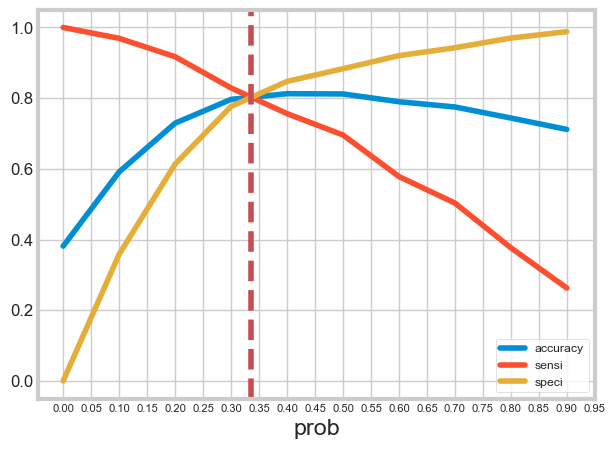

In [251]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.335, color='r', linestyle='--') # additing axline
plt.yticks(size=12)
plt.show()

Inferences:<br>
From the above graph, 0.335 seems to be ideal cut-off points

In [252]:
y_train_pred_final['final_predicted_1'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.335 else 0)
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) # deleting the unnecessary columns
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1
0,0,0.250866,1871,0
1,0,0.204929,6795,0
2,0,0.292520,3516,0
3,0,0.774801,8105,1
4,0,0.250866,3934,0


In [253]:
# Let's assign Lead_score for the leads in Train Data Set
y_train_pred_final['lead_score_1']=(y_train_pred_final['Converted_Prob']*100).astype("int64")
y_train_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1
4891,1,0.999521,8074,1,99
3115,1,0.999504,2656,1,99
6312,1,0.999146,3428,1,99
6187,1,0.998978,7579,1,99
5672,1,0.998885,6751,1,99
...,...,...,...,...,...
109,0,0.012122,6588,0,1
5487,0,0.011842,8678,0,1
747,0,0.011566,6283,0,1
2722,0,0.008259,7557,0,0


<h2>ROC Curve</h2></h2>

In [260]:
# recoring the values FPR, TPR and Thresholds:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'] , drop_intermediate = False )

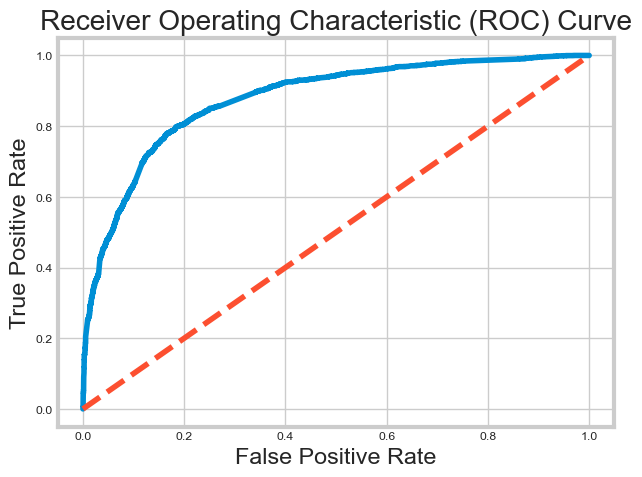

In [262]:
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')  # Plotting the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

<b>Infrences:</b>
* ROC Curve aread is 0.88, which indicates that the model is good.

<h2>Precision- Recall Trade off</h2>

In [263]:
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted_IND'], y_train_pred_final['Converted_Prob'])

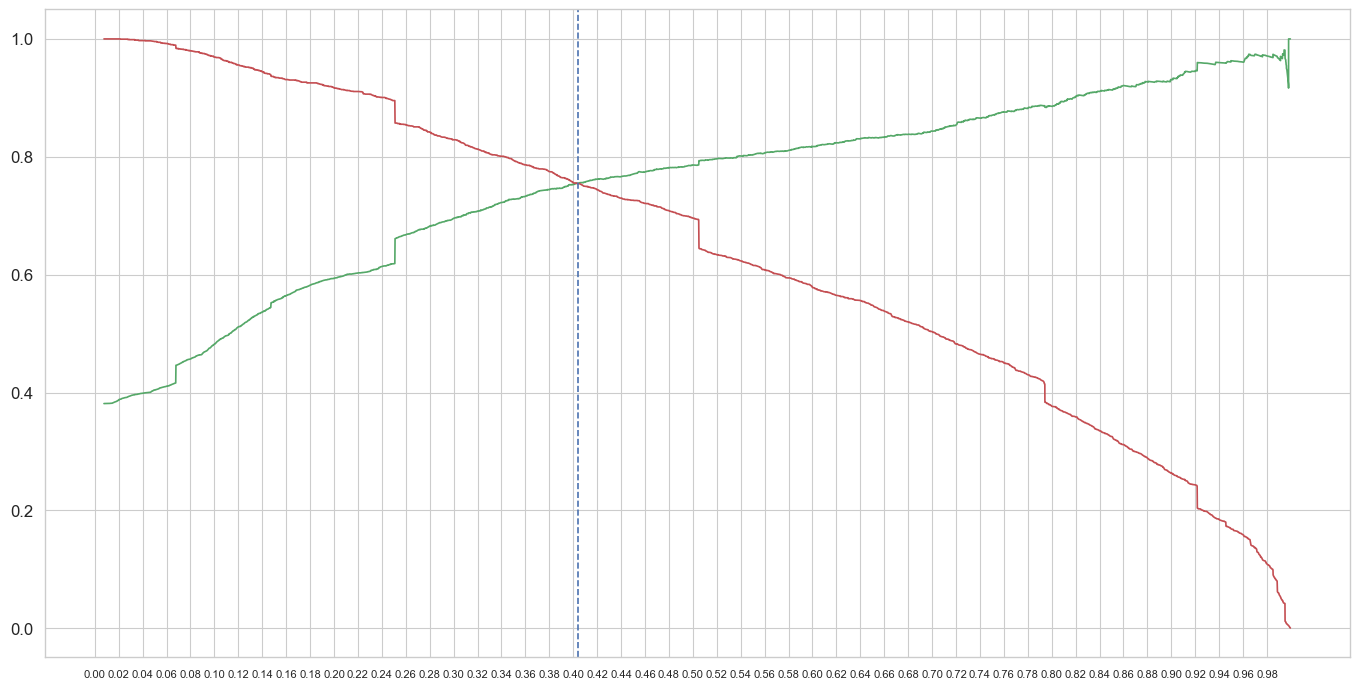

In [264]:
# Plotting the Precision-Recall Trade off Curve
plt.figure(figsize=(15,8))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.404, color='b', linestyle='--') # additing axline
plt.xticks(np.arange(0,1,step=0.02),size=8)
plt.yticks(size=12)

plt.show()

Inferences:
* Based on Precision- Recall Trade off curve, the cutoff point seems to 0.404. We will use this threshold value for Test Data Evaluation

In [265]:
# plotting the Train dataset again with 0.42 as cutoff
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.404 else 0)
y_train_pred_final.head()

,Converted_IND,Converted_Prob,Prospect_IND,final_predicted_1,lead_score_1,final_predicted_2
0,0,0.250866,1871,0,25,0
1,0,0.204929,6795,0,20,0
2,0,0.292520,3516,0,29,0
3,0,0.774801,8105,1,77,1
4,0,0.250866,3934,0,25,0


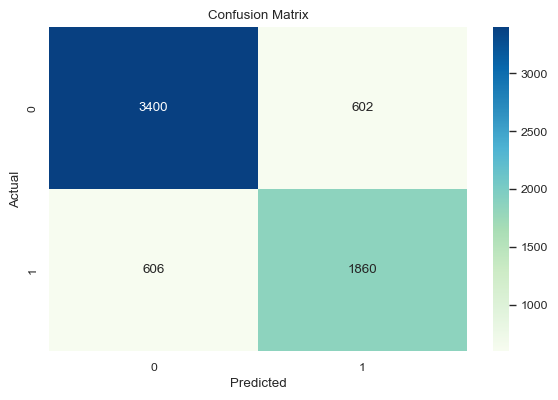

In [272]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def draw_cm(actual, predicted, cmap='Blues'):
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Usage:
draw_cm(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'], cmap='GnBu')


In [274]:
from sklearn.metrics import confusion_matrix

def lg_metrics(confusion):
    tn, fp, fn, tp = confusion.ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1_score:.2f}")

# Usage:
conf_matrix = confusion_matrix(y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'])
lg_metrics(conf_matrix)


Accuracy: 0.81
Precision: 0.76
Recall: 0.75
F1 Score: 0.75


In [275]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_train_pred_final['Converted_IND'], y_train_pred_final['final_predicted_2'] ) )

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4002
           1       0.76      0.75      0.75      2466

    accuracy                           0.81      6468
   macro avg       0.80      0.80      0.80      6468
weighted avg       0.81      0.81      0.81      6468



<h1><u>Model Evaluation : Test Data</u></h1>

In [276]:
# Scaling the test dataset :
X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']] = scaler.transform(X_test[['Total Time Spent on Website','Page Views Per Visit','TotalVisits']])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
4269,0,1.749143,0.964504,2.117849,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2376,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7766,0,0.662077,-0.777416,1.553761,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9199,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4359,0,-1.149699,-0.885371,-1.266675,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [277]:
# Selecting only the columns used in final model of Train Dataset
X_test = X_test[features]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Occupation_Working Professional,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
4269,0,0.964504,0,0,0,0,0,0,0,1,0,0
2376,0,-0.885371,0,1,0,0,0,0,0,1,0,0
7766,0,-0.777416,0,0,0,0,1,0,0,0,1,0
9199,0,-0.885371,0,0,1,0,0,0,1,0,0,0
4359,0,-0.885371,0,1,0,0,0,1,0,0,0,0


In [280]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.columns

Index(['const', 'Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Occupation_Working Professional', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed'],
      dtype='object')

In [281]:
# Predicting the final test model 
y_test_pred = log_model9.predict(X_test_sm)

In [282]:
#checking the top 10 rows
y_test_pred[:10]

4269    0.741716
2376    0.921619
7766    0.742460
9199    0.067694
4359    0.794282
9186    0.501616
1631    0.423215
8963    0.177048
8007    0.090863
5324    0.290588
dtype: float64

In [283]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.741716
2376,0.921619
7766,0.742460
9199,0.067694
4359,0.794282


In [284]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [285]:
# Putting CustID to index
y_test_df['Prospect_IND'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect_IND,0
0,1,4269,0.741716
1,1,2376,0.921619
2,1,7766,0.742460
3,0,9199,0.067694
4,1,4359,0.794282


In [286]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final= y_pred_final.rename(columns={ 'Converted' : 'Converted_IND'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect_IND','Converted_IND','Converted_Prob'], axis=1)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob
0,4269,1,0.741716
1,2376,1,0.921619
2,7766,1,0.742460
3,9199,0,0.067694
4,4359,1,0.794282


<b>Strategy</b>
Now we will use Cutoff point of 0.335 from Sentivity - Specificity - Accuracy cut-off points

In [287]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.335 else 0)
y_pred_final.head()

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted
0,4269,1,0.741716,1
1,2376,1,0.921619,1
2,7766,1,0.742460,1
3,9199,0,0.067694,0
4,4359,1,0.794282,1


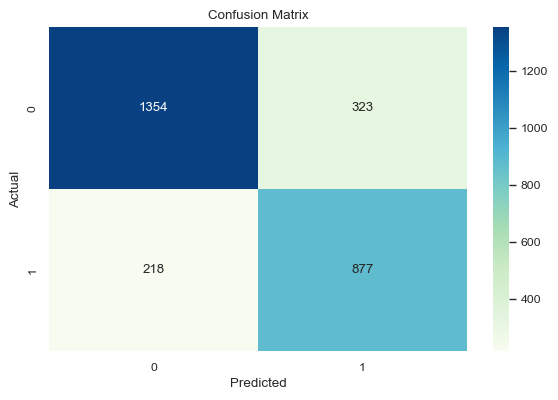

In [288]:
#Plotting the Confusion Matrix
draw_cm( y_pred_final['Converted_IND'], y_pred_final['final_predicted'], "GnBu")

In [289]:
conf_matrix = confusion_matrix(y_pred_final['Converted_IND'], y_pred_final['final_predicted'])

lg_metrics(conf_matrix)

Accuracy: 0.80
Precision: 0.73
Recall: 0.80
F1 Score: 0.76


Inferences:
*  The sensitivity value on Test data is 80.09% vs 80.29% in Train data. The accuracy values is 80.48%. It shows that model is performing well in test data set also and is not over-trained.

In [291]:
from sklearn.metrics import roc_curve, auc

def draw_roc(actual, probabilities):
    fpr, tpr, thresholds = roc_curve(actual, probabilities)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()



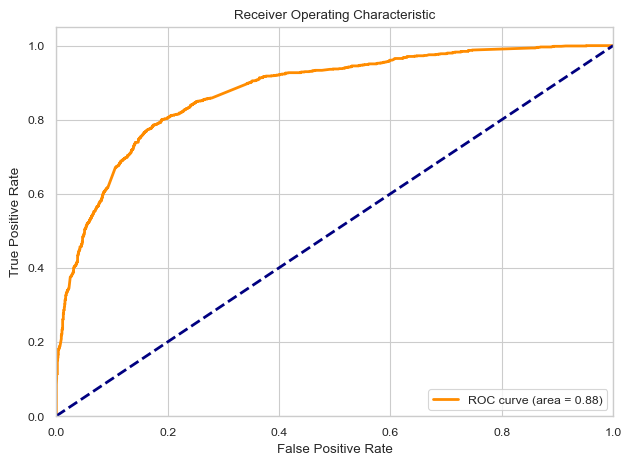

In [292]:
# Invoking the function to draw ROC curve

draw_roc( y_pred_final['Converted_IND'], y_pred_final['Converted_Prob'])

Inferences:<br>
ROC value of 0.88 shows the model is performing well in Test dataset

In [293]:
# Classification Record : Precision, Recall and F1 Score
print( metrics.classification_report( y_pred_final['Converted_IND'], y_pred_final['final_predicted'] ) )

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1677
           1       0.73      0.80      0.76      1095

    accuracy                           0.80      2772
   macro avg       0.80      0.80      0.80      2772
weighted avg       0.81      0.80      0.81      2772



In [294]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['lead_score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
546,3478,1,0.999470,1,99
745,6383,1,0.999440,1,99
2405,5921,1,0.999034,1,99
1091,818,1,0.998702,1,99
2150,133,1,0.997865,1,99
...,...,...,...,...,...
2146,5472,0,0.014585,0,1
796,6934,0,0.014528,0,1
17,3545,0,0.010709,0,1
1396,7046,0,0.010483,0,1


In [295]:
# checking the data from top 
y_pred_final.head(5)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
0,4269,1,0.741716,1,74
1,2376,1,0.921619,1,92
2,7766,1,0.742460,1,74
3,9199,0,0.067694,0,6
4,4359,1,0.794282,1,79


In [296]:
# checking the data from bottom 
y_pred_final.tail(5)

,Prospect_IND,Converted_IND,Converted_Prob,final_predicted,lead_score
2767,8649,0,0.082372,0,8
2768,2152,1,0.921619,1,92
2769,7101,0,0.250866,0,25
2770,5331,0,0.259089,0,25
2771,2960,1,0.921619,1,92


<b>Inferences:</b><br>
We can use the lead_score column to identify which potential leads to prioritize first. The higher the score, the higher chances are there for the lead to convert. If there are limited sales representatives, then score cut-off should be higher to ensure a higher conversion probability people are contacted further to turn them into a potential customer. It is the same as increasing the precision value of the model by adjusting the cut-off point to a higher value. In case there are more resources available in the sales team (i.e., interns, etc. ), then the score cut-off can be lowered. As there are more human resources, the company can afford a higher rate of False positives as it will increase the customer outreach and, in turn, increase the potential customer who will take the online courses.

<h1><b><u><i>Conclusion</i></u></b></h1>

Predictors

In [297]:
# Let's look into final model features and coefficients 
pd.options.display.float_format = '{:.2f}'.format
final_parameters = log_model9.params[1:]
final_parameters

Do Not Email                            -1.26
Total Time Spent on Website              1.09
Lead Origin_Landing Page Submission     -0.25
Lead Origin_Lead Add Form                3.42
Lead Source_Olark Chat                   0.98
Lead Source_Welingak Website             1.99
Occupation_Working Professional          2.84
Last Activity_Email Opened               0.66
Last Activity_Olark Chat Conversation   -0.87
Last Activity_SMS Sent                   1.78
Last Activity_Unreachable                0.84
Last Activity_Unsubscribed               1.25
dtype: float64

In [298]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

top_predictors = final_parameters
top_predictors = 100.0 * (top_predictors / top_predictors.max())
top_predictors

Do Not Email                            -36.88
Total Time Spent on Website              31.78
Lead Origin_Landing Page Submission      -7.45
Lead Origin_Lead Add Form               100.00
Lead Source_Olark Chat                   28.52
Lead Source_Welingak Website             58.16
Occupation_Working Professional          82.89
Last Activity_Email Opened               19.38
Last Activity_Olark Chat Conversation   -25.31
Last Activity_SMS Sent                   51.94
Last Activity_Unreachable                24.52
Last Activity_Unsubscribed               36.60
dtype: float64

<Figure size 1200x800 with 0 Axes>

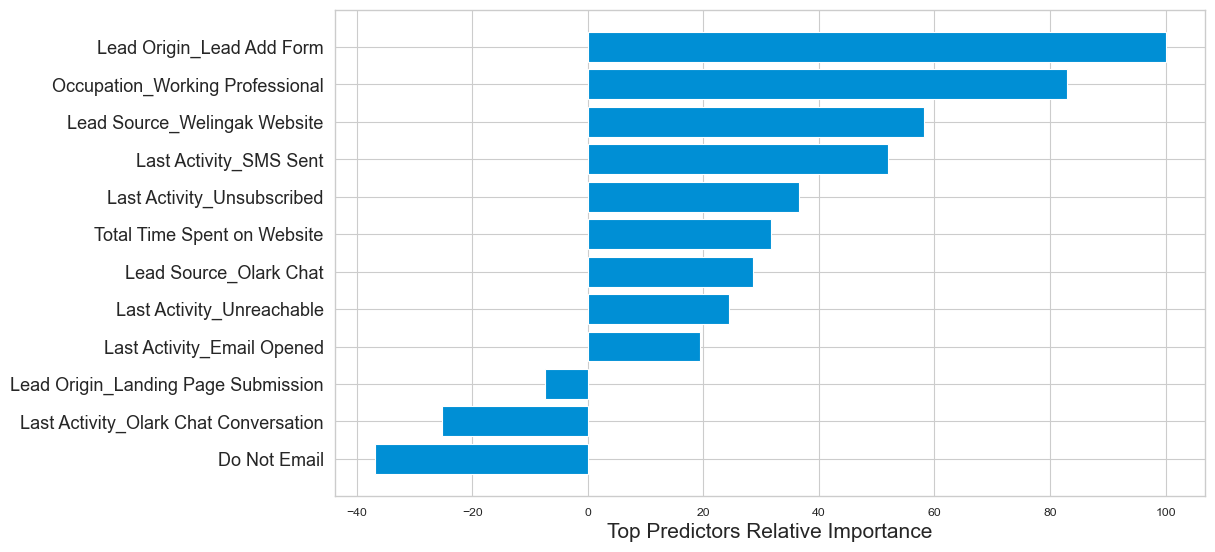

In [299]:
# Plotting the predictors based on their relative importance
top_predictors_sort = np.argsort(top_predictors,kind='quicksort',order='list of str')
fig = plt.figure(figsize = (12,8))
pos = np.arange(top_predictors_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,6))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_predictors[top_predictors_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train[features].columns)[top_predictors_sort], fontsize=13)
ax.set_xlabel('Top Predictors Relative Importance', fontsize=15)
plt.show()

<h2>Model Summary</h2>

Interpretation Logistic regression model with multiple predictor variables
In general, we can have multiple predictor variables in a logistic regression model as below:

logit(p) = log(p/(1-p))= β0 + β1* X1 + … + βn * Xn

Applying such a model to our example dataset, each estimated coefficient is the expected change in the log odds of being a potential lead for a unit increase in the corresponding predictor variable holding the other predictor variables constant at a certain value. Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a unit increase in the corresponding predictor variable holding other variables at a certain value.

We can make predictions from the estimates. We do this by computing the effects for all of the predictors for a particular scenario, adding them up, and applying a logistic transformation.
Consider the scenario of a lead who is a working professional and who was identified from Welingak website and who had chatted on Olark Chat and who spent no time on the website and wanted to be contacted by E-mail.

Then we can calculate his conversion probability as 3.42 * 0 + 2.84 * 1 + 1.99 * 1 + 1.78 * 0 + 1.25 * 0 + 1.09 * 0 + 0.98 * 0 + 0.84 * 0 + 0.66 * 0 - 0.25 * 0 -0.87 * 1 - 1.26 * 0 -1.77 = 2.84 + 1.99 - 0.87 - 1.77 = 2.19 which is log(p/(1-p)).
The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.19)) = 1 /(1 + exp(2.2)) = 0.10 = 10%

****    The magnitude and sign of the coefficients loaded in the logit function:
logit(p) = log(p/(1-p)) = (3.42 * Lead Origin_Lead Add Form) + (2.84 * Occupation_Working Professional) + (1.99 * Lead Source_Welingak Website) + (1.78 * Last Activity_SMS Sent) + (1.25 * Last Activity_Unsubscribed) + (1.09 * Total Time Spent on Website) + (0.98 * Lead Source_Olark Chat) + (0.84 * Last Activity_Unreachable) + (0.66 * Last Activity_Email Opened) - (0.25 * Lead Origin_Landing Page Submission) -(0.87 * Last Activity_Olark Chat Conversation) - (1.26 * Do Not Email) -1.77 

<b>Predicting Probabilities</b>
We can make predictions from the estimates. We do this by computing the effects for all of the predictors for a particular scenario, adding them up, and applying a logistic transformation.

Consider the scenario of a lead who is a working professional and who was identified from Welingak website and who had chatted on Olark Chat and who spent no time on the website and wanted to be contacted by E-mail.

Then we can calculate his conversion probability as 3.41 * 0 + 2.82 * 1 + 2.34 * 0 + 2.01 * 1 + 1.86 * 0 + 1.32 * 0 + 1.09 * 0 + 0.97 * 0 + 0.93 * 0 + 0.76 * 0 - 0.26 * 0 -0.77 * 1 - 1.24 * 0 -1.86
which is 2.82 + 2.01 - 0.77 - 1.86 = 2.2 which is log(p/(1-p))

The logistic transformation is:
Probability = 1 / (1 + exp(-x)) = 1 /(1 + exp(- -2.2)) = 1 /(1 + exp(2.2)) = 0.143 = 14.3%

<b>Odds ratios</b><br>
Sometimes, marketing team may need to get odds rather than probabilities as the concept of odds ratios is of sociological rather than logical importance.

<p>To understand odds ratios we first need a definition of odds, which is the ratio of the probabilities of two mutually exclusive outcomes. Consider our prediction of the probability of lead conversion of 10% from the earlier section on probabilities. As the probability of lead conversion is 10%, the probability of non-conversion is 100% - 10% = 90%, and thus the odds are 10% versus 90%. Dividing both sides by 90% gives us 0.11 versus 1, which we can just write as 0.11. So, the odds of 0.11 is just a different way of saying a probability of lead conversion of 10%.</p>
<p></p>
<p>
Similarly We can interpret from the model that, holding all categorical and numerical variables at a fixed value, the odds of a lead being converted for a Working Professional (Working Professional = 1)over the odds of lead being converted for non-working professionals (Working Professional = 0) is exp(.2.84) = 17.11</p>

This means log(p/(1-p)) = 17.11 when all other variables are at fixed value

We can use this odds ratios method to identify the potential lead conversions on comparing the individuals profile.